<hr style="height: 1px;">
<i>This notebook was authored by the 8.S50x Course Team, Copyright 2022 MIT All Rights Reserved.</i>
<hr style="height: 1px;">
<br>

<h1>Lesson 11: Hypothesis Testing Part 1</h1>


<a name='section_11_0'></a>
<hr style="height: 1px;">


## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L11.0 Overview</h2>


<h3>Navigation</h3>


<table style="width:100%">
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_11_1">L11.1 Likelihood Ratio and Hypothesis Testing</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_11_1">L11.1 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_11_2">L11.2 Hypothesis Test Example</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_11_2">L11.2 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_11_3">L11.3 A More Realistic Example</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_11_3">L11.3 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_11_4">L11.4 Probability of Fit</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_11_4">L11.4 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_11_5">L11.5 The t-test Statistic</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_11_5">L11.5 Exercises</a></td>
    </tr>
</table>



<h3>Learning Objectives</h3>

In this lesson, we begin by discussing how the likelihood ratio is a measure of the strength of evidence in favor of one hypothesis over another, and how it plays a crucial role in hypothesis testing and model selection.

We go on to introduce the concept of hypothesis testing, and explain how to set up the null and alternative hypotheses, select a significance level, and calculate the test statistic and p-value.

We will also cover the concept of the probability of fit, which refers to the probability that the observed data is consistent with the null hypothesis. We will explain how to calculate the probability of fit using the p-value and how to interpret the results of the hypothesis test based on the significance level and the probability of fit.

<h3>Importing Libraries</h3>

Before beginning, run the cell below to import the relevant libraries for this notebook.

In [6]:
#>>>RUN: L11.0-runcell00

!pip install lmfit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.1 MB/s eta 0:00:00


In [7]:
#>>>RUN: L11.0-runcell01

import numpy as np                #https://numpy.org/doc/stable/
import lmfit                      #https://lmfit.github.io/lmfit-py/
import matplotlib.pyplot as plt   #https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html
from scipy import stats           #https://docs.scipy.org/doc/scipy/reference/stats.html

<h3>Setting Default Figure Parameters</h3>

The following code cell sets default values for figure parameters.

In [8]:
#>>>RUN: L11.0-runcell02

#set plot resolution
%config InlineBackend.figure_format = 'retina'

#set default figure parameters
plt.rcParams['figure.figsize'] = (9,6)

medium_size = 12
large_size = 15

plt.rc('font', size=medium_size)          # default text sizes
plt.rc('xtick', labelsize=medium_size)    # xtick labels
plt.rc('ytick', labelsize=medium_size)    # ytick labels
plt.rc('legend', fontsize=medium_size)    # legend
plt.rc('axes', titlesize=large_size)      # axes title
plt.rc('axes', labelsize=large_size)      # x and y labels
plt.rc('figure', titlesize=large_size)    # figure title



<a name='section_11_1'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L11.1 Likelihood Ratio and Hypothesis Testing</h2>  

| [Top](#section_11_0) | [Previous Section](#section_11_0) | [Exercises](#exercises_11_1) | [Next Section](#section_11_2) |


*The material in this section is discussed in the video **<a href="https://courses.mitxonline.mit.edu/learn/course/course-v1:MITxT+8.S50.2x+1T2025/block-v1:MITxT+8.S50.2x+1T2025+type@sequential+block@seq_LS11/block-v1:MITxT+8.S50.2x+1T2025+type@vertical+block@vert_LS11_vid1" target="_blank">HERE</a>.** You are encouraged to watch that video and use this notebook concurrently.*

<h3>Slides</h3>

Run the code below to view the slides for this section, which are discussed in the related video. You can also open the slides in a separate window <a href="https://mitx-8s50.github.io/slides/L10/slides_L10_06.html" target="_blank">HERE</a>.

In [9]:
#>>>RUN: L11.1-slides

from IPython.display import IFrame
IFrame(src='https://mitx-8s50.github.io/slides/L10/slides_L10_06.html', width=970, height=550)

<h3>Likelihood Ratio and Hypothesis Testing</h3>

The most powerful way to compare two distributions is to compute the likelihood of each, and then take their ratio. By taking the $\log$ of this ratio, we end up with a robust way to define a hypothesis test.
We define this as

$$
\begin{eqnarray}
\lambda & = & -2 \log\left(\frac{\mathcal{L_{\rm null}}}{\mathcal{L_{\rm alternative}}}\right) \\
        & = & -2 \left[\log\left(\mathcal{L_{\rm null}}\right) - \log\left(\mathcal{L_{\rm alternative}}\right)\right]  
\end{eqnarray}
$$

**Note:** the factor of $-2$ in this definition of the likelihood ratio ensures that the log-likelihood is chi-square distributed if the alternative hypothesis is false.

Recall that the likelihood is just the probability of a specific thing happening. The likelihood ratio is just the ratio of the maximum probabilities of two hypotheses.

By taking the log, we see that the delta log-likelihood is a measure of the difference between two likelihood values. Specifically, it is the difference between the log-likelihood of one model fit a set of data and the log-likelihood of a different model fit to the same set of data. This enables us to define a way to test a hypothesis.

Note that, in this case, the term "fit" may be different for the two hypotheses. For example, in the comparison shown below, only the width of a Gaussian is varied for one of the hypotheses, while both the mean and width are allows to vary in the second case. In some instances, one of the models might have no adjustable parameters at all.

<h3>An Analytic Example</h3>

Let's do an analytic example to start with. Imagine you have a set of points $x_{i}$, and you want to test the hypothesis that this sample has mean $\mu_{0}$ vs the alternative hypothesis that the mean is $\neq \mu_{0}$. Let's write out the likelihood for both scenarios.


**Hypothesis $\mu_{0}$**

The likelihood is just written following the form below as:

$$
\begin{equation}
\mathcal{L}(x|\mu_{0},\sigma) = \left(\frac{1}{\sqrt{2\pi\sigma^{2}}}\right)^{N} \exp\left(-\sum_{i=0}^{N} \frac{(x_{i}-\mu_{0})^2}{2\sigma^{2}}\right)\\
\log\left(\mathcal{L}(x|\mu_{0},\sigma) \right) =  -\frac{N}{2}\log\left(2\pi\sigma^{2}\right) - \sum_{i=0}^{N} \frac{(x_{i}-\mu_{0})^2}{2\sigma^{2}}
\end{equation}
$$

Now, since we are maximizing all of our parameters except for $\mu$, $\sigma$ will be the optimized value denoted $\hat{\sigma}_{\mu_{0}}$ and given by:

$$
\begin{eqnarray}
\hat{\sigma}_{\mu_{0}}^{2} & = & \frac{1}{N} \sum_{i=0}^{N}(x_{i}-\mu_{0})^2  
\end{eqnarray}
$$

which means, we can write the above as

$$
\begin{equation}
\log\left(\mathcal{L}(x|\mu_{0},\sigma_{\mu_{0}}) \right) =  -\frac{N}{2}\left(\log\left(2\pi\hat{\sigma}_{\mu_{0}}^{2}\right) + 1\right)
\end{equation}
$$

Finally, one more relation that is useful is that if $\mu_{0}\neq\bar{x}$, we can write this as

$$
\begin{eqnarray}
\hat{\sigma}^{2}_{\mu_{0}} & = & \frac{1}{N} \sum_{i=0}^{N} \left(x_{i} - \bar{x} + \bar{x}-\mu_{0}\right)^{2} \\
                 & = & \frac{1}{N} \sum_{i=0}^{N} \left(\left(x_{i} - \bar{x}\right)^2 + \left(\bar{x}-\mu_{0}\right)^{2} + 2(x_{i} - \bar{x})(\bar{x}-\mu_{0})\right) \\
                 & = & \frac{1}{N} \sum_{i=0}^{N} \left(\left(x_{i} - \bar{x}\right)^2 + \left(\bar{x}-\mu_{0}\right)^{2}\right) \\
                 & = & \hat{\sigma}^{2} +  \left(\bar{x}-\mu_{0}\right)^{2}
\end{eqnarray}
$$

where we have use the result from Lesson 10 for $\hat{\sigma}^{2}$, the optimized value of $\sigma$ when $\mu$ is also allowed to vary.

**Alternative Hypothesis $\mu\neq\mu_{0}$**

In this scenario, we want to compute the maximum likelihood by allowing *all parameters* to vary, whereas above we fixed the value of $\mu$. Noting that the optimized value of $\mu$ (also derived in Lesson 10) is $\hat{\mu}=\bar{x}$, we can write:

$$
\begin{equation}
\mathcal{L}(x|\hat{\mu}=\bar{x},\hat{\sigma}) = \left(\frac{1}{\sqrt{2\pi\hat{\sigma}^{2}}}\right)^{N} \exp\left(-\sum_{i=0}^{N} \frac{(x_{i}-\bar{x})^2}{2\hat{\sigma}^{2}}\right)\\
\log\left(\mathcal{L}(x|\hat{\mu}=\bar{x},\hat{\sigma}) \right) =  -\frac{N}{2}\log\left(2\pi\hat{\sigma}^{2}\right) - \sum_{i=0}^{N} \frac{(x_{i}-\bar{x})^2}{2\hat{\sigma}^{2}} \\
\log\left(\mathcal{L}(x|\hat{\mu}=\bar{x},\hat{\sigma}) \right) =  -\frac{N}{2}\left(\log\left(2\pi\hat{\sigma}^{2}\right) + 1\right)
\end{equation}
$$

The log-likelihood ratio for these two hypotheses is

$$
\begin{eqnarray}
\lambda_{\log} & = & -2\left[ \log\left(\mathcal{L}(x|\mu_{0},\sigma_{\mu_{0}})\right) - \log\left( \mathcal{L}(x|\hat{\mu},\hat{\sigma})\right) \right]\\
       & = & -N\left(\log\left(2\pi\hat{\sigma}^{2}\right) + 1\right) + N\left(\log\left(2\pi\hat{\sigma}_{\mu_{0}}^{2}\right) + 1\right) \\
        & = & N \log\left(\frac{\hat{\sigma}^{2}_{\mu_{0}}}{\hat{\sigma}^{2}}\right) \\
        & = & N \log\left(\frac{\hat{\sigma}^{2} +  \left(\bar{x}-\mu_{0}\right)^{2}}{\hat{\sigma}^{2}}\right)\\
        & = & N \log\left(1+ \frac{\left(\bar{x}-\mu_{0}\right)^{2}}{\hat{\sigma}^{2}}\right)\\
        & \approx & N \frac{\left(\bar{x}-\mu_{0}\right)^{2}}{\hat{\sigma}^2}
\end{eqnarray}
$$

where, in the last step, we used the Taylor expansion of the $\log$ which is valid for small $|\mu_{0}-\bar{x}|$. Incidentally, if we had done a $\chi^{2}$ test, we would converge on the same thing (in this case, $\lambda$ is a difference in $\chi^2$ values, rather than a ratio of likelihoods):

$$
\begin{eqnarray}
\lambda_{\chi^2} & = & \sum_{i=0}^{N} \frac{(x_{i}-\mu_{0})^2}{\hat{\sigma}^{2}} - \frac{(x_{i}-\bar{x})^2}{\hat{\sigma}^{2}} \\
        & = & \frac{1}{\hat{\sigma}^2} \sum_{i=0}^{N} \left(x_{i}-\mu_{0}\right)^2 - \left(x_{i}-\bar{x}\right)^2 \\
        & = & \frac{1}{\hat{\sigma}^2} \sum_{i=0}^{N} x^{2}_{i} - x^{2}_{i} - 2 x_{i}\left(\mu_{0}-\bar{x}\right) + \mu_{0}^2 -\bar{x}^2 \\
        & = & \frac{1}{\hat{\sigma}^2} \sum_{i=0}^{N} \left(\mu_{0}-\bar{x}\right)^{2} \\
        & = & \frac{N}{\hat{\sigma}^2} \left(\mu_{0}-\bar{x}\right)^{2}
\end{eqnarray}
$$

where we have used
$$
\begin{eqnarray}
\sum_{i=0}^{N} 2x_i\bar{x} & = & 2\bar{x}\sum_{i=0}^{N}x_i=2N\bar{x}^2=\sum_{i=0}^{N}2\bar{x}^2\\
\sum_{i=0}^{N}-2x_i\mu_{0} & = & -2\mu_{0}\sum_{i=0}^{N}x_i = \sum_{i=0}^{N}-2\mu_{0}\bar{x}\\
\end{eqnarray}
$$



For both cases, what we see is that our likelihood ratio is exactly equivalent to the exponent for a Gaussian distribution of $\bar{x}$ about $\mu_{0}$, with a variance given by $\hat{\sigma}^2/(2N)$.

<h3>Wilks' Theorem and Degrees of Freedom</h3>

Imagine that we did this calculation for a few datasets with respective means given by $\bar{x}_{i}$. If we considered a few different samples (for example bins in a histogram), we can write this by just adding a summation:


$$
\begin{eqnarray}
\lambda & = & \sum_{i=0}^{N_{\rm bins}} \frac{N_{i}}{\hat{\sigma}_{0}^2} \left(\mu_{i}-\bar{x}_{i}\right)^{2}
\end{eqnarray}
$$

This is very similar to a $\chi^{2}$ test.  More generally, this is a sum of Gaussian variables $\mu_{i}$, which means that the variation of the log-likelihood is going to follow a $\chi^2_{\nu}$ distribution with $\nu=N_{\rm bins}$ as the number of degrees of freedom.

What we have done above is a demonstration of one example of Wilks' theorem, which says that the log-likelihood ratio $\lambda_{log}\rightarrow\chi^2_{\nu}$ in the limit of $N\rightarrow\infty$. Here, $\chi^2_{\nu}$ is a $\chi^2$ distribution with $\nu$ degrees of freedom. In Wilks' Theorem, $\nu$ is equal to the difference in the number of parameters that are fit in the null and alternative hypotheses.

<h3>A Computational Example</h3>

Let's show another example of Wilks' Theorem. First, let's make two Gaussian distributions with different means and sample each distribution 50 times:

$$
\begin{equation}
 p_{a} (x) = \mathcal{N}(x,\mu=0,\sigma=1)\\
 p_{b} (x) = \mathcal{N}(x,\mu=0.2,\sigma=1)
\end{equation}
$$

In the code below, $p_{a} (x)$ is called `testSamplesA` and $p_{b} (x)$ is called `testSamplesB`. First we plot histrograms of the data using 5 bins, with error bars. For this small sample size, we see the data look fairly similar. After plotting the distributions, we will compute the delta-loglikelihood value.

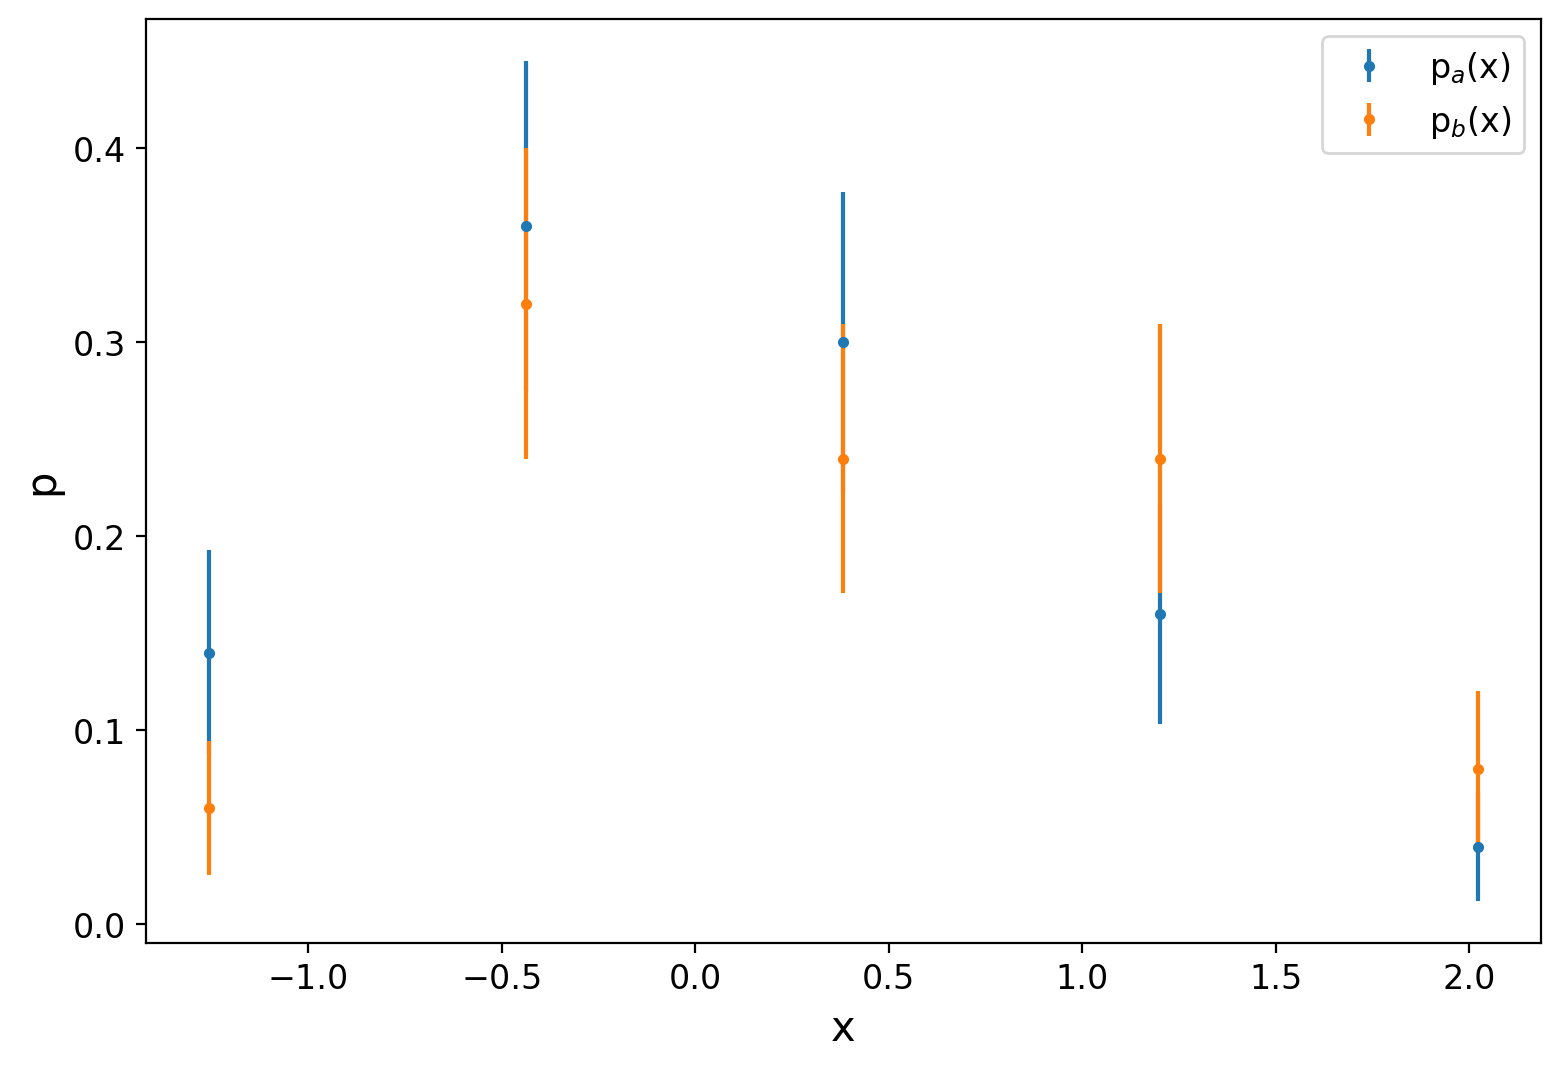

In [10]:
#>>>RUN: L11.1-runcell01

np.random.seed(5)

testSamplesA = np.random.normal(0  ,1, 50)
testSamplesB = np.random.normal(0.2,1, 50)

def plotHist(iSamples,iLabel,bin_edges=None):
    if bin_edges is None:
        y, bin_edges = np.histogram(iSamples, bins=5)
    else:
        y, bin_edges = np.histogram(iSamples, bins=bin_edges)
    bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
    norm=len(iSamples)
    plt.errorbar(bin_centers,y/norm,yerr=y**0.5/norm,fmt=".",label=iLabel)
    return bin_edges

bin_edges=plotHist(testSamplesA,"p$_{a}$(x)")
bin_edges=plotHist(testSamplesB,"p$_{b}$(x)",bin_edges)
plt.xlabel("x")
plt.ylabel("p")
plt.legend()
plt.show()

Now we can compute the delta-loglikelihood of the samples. To do so, we define the function `loglikelihoodGaus`, which does the following:

1. First, if the value of `mu0` is set to the default value of `-1`, the mean `mu0` is calculated as the mean of the input sample by `mu0 = isample.mean()`. Similarly, if `sigma0` is set to `-1`, the estimated variance `sigmahat2` is computed using the formula `(isample - mu0)**2 / len(isample)`, which calculates the squared deviations from the mean divided by the sample size. Then, `sigmahat2` is updated as the sum of these squared deviations by `sigmahat2 = sum(sigmahat2)`.

2. The log-likelihood value `val` is computed based on the formula `-n/2 * (np.log(2*np.pi*sigmahat2) + 1)`.

3. Then we compute the difference between the log-likelihoods of the two different samples that are provided. The value `hypoth` represents the log-likelihood computed using `testSamplesA` as the input sample and a fixed mean of `0` (as specified by the `mu0` parameter). The value `null` represents the log-likelihood computed using `testSamplesB` as the input sample, where the mean is allowed to vary.

Ultimately, the difference between `hypoth` and `null` indicates the contrast between the log-likelihoods of the two samples. This value does not have much meaning yet, but we will use it in the next section.

In [11]:
#>>>RUN: L11.1-runcell02

#Now let's compute the log-likelihood values of our samples
#ulimately, we will use this function to see if Wilks' theorem is true (in the next section)

#Let's define the log-likelihood in the simplest way possible (assume we don't know math)
#note we will use -1 to compute these on the fly
def loglikelihoodGaus(isample,mu0=-1,sigma0=-1):
    n=len(isample)
    if mu0 == -1:
        mu0=isample.mean()
    if sigma0 == -1:
        sigmahat2=(isample-mu0)**2/len(isample)
        sigmahat2=sum(sigmahat2)
    val=-n/2*(np.log(2*np.pi*sigmahat2)+1)
    return val

hypoth=loglikelihoodGaus(testSamplesA,0) #compute with a fixed mean of 0
null  =loglikelihoodGaus(testSamplesB) #compute with mean floating
print(hypoth-null)

8.389473956475307


<h3>Summary</h3>

The likelihood function essentially quantifies the probability of observing the given data under the assumption that the parameters have specific values.

In this section, we have introduced the idea of maximum likelihood estimation, the goal of which is to find the parameter values that maximize the likelihood function (in other words, it seeks to find the parameter values that make the observed data most probable).

Wilk's theorem makes the connection between maximum likelihood estimation and the chi-square distribution because the test statistic (the likelihood ratio), which is used to assess the fit of observed data to an expected distribution, follows a chi-square distribution. Thus, the chi-square distribution is often used as a reference distribution in hypothesis testing.

<a name='exercises_11_1'></a>     

| [Top](#section_11_0) | [Restart Section](#section_11_1) | [Next Section](#section_11_2) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-11.1.1</span>

Which of the following best describes the use of the likelihood ratio in statistical inference?

A) To compare the fit of two models to a given set of data\
B) To calculate the probability of observing a particular value of a parameter\
C) To determine the significance of a test statistic\
D) To estimate the distribution of a random variable

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-11.1.2</span>

The first hypothesis test was developed by a statistician (Fisher) when he was serving tea to Muriel Bristol and her fiancee William Roach. Muriel claimed that she could tell whether milk was poured into a tea cup before the tea was poured in or after it was poured in.

To test this, the statistician made 8 cups of tea, with 4 of those cups having milk before the tea was poured, and 4 of those cups having milk after the tea was poured.

What is the null Hypothesis in this test? Choose the best answer from the following:

A) Muriel will select all cups correctly.\
B) Muriel will not have any correct selections.\
C) Muriel will just guess randomly, and so will have some correct and some incorrect selections.\
D) Muriel will have exactly 1/2 correct selections and 1/2 incorrect selections.

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-11.1.3</span>

Muriel apparently guessed all 4 cups correctly that had milk poured in before (and likewise the other 4 that had it poured after). What is the probability that she guessed randomly and just got lucky? Enter your answer as a number with precision 1e-3.

In [12]:
#>>>EXERCISE: L11.1.3
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

from scipy.special import comb

#Hint: use comb(n,k), where
#comb(n,k) is the number of combinations of n with k chosen
1/comb(8,4)


0.014285714285714285

<a name='section_11_2'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L11.2 Hypothesis Test Example</h2>  

| [Top](#section_11_0) | [Previous Section](#section_11_1) | [Exercises](#exercises_11_2) | [Next Section](#section_11_3) |


*The material in this section is discussed in the video **<a href="https://courses.mitxonline.mit.edu/learn/course/course-v1:MITxT+8.S50.2x+1T2025/block-v1:MITxT+8.S50.2x+1T2025+type@sequential+block@seq_LS11/block-v1:MITxT+8.S50.2x+1T2025+type@vertical+block@vert_LS11_vid2" target="_blank">HERE</a>.** You are encouraged to watch that video and use this notebook concurrently.*

<h3>Learning Objectives</h3>

Let's continue with the specific example of comparing two datasets drawn from Gaussian distributions, one with a mean of $\mu=0$ and one with $\mu=0.2$. We started this in the last section, and computed the delta log-likelihood for a dataset of 50 samples drawn from each distribution, but how do we interpret our result?

Now, in this setup, we compute the delta log-likelihood for the same distributions many times (10000 times), and plot a histogram of delta log-likelihood values.

In all cases, the hypothesis is that the mean is $\mu=0$ and the null is that the value of $\mu$ can be varied to best fit each data sample.

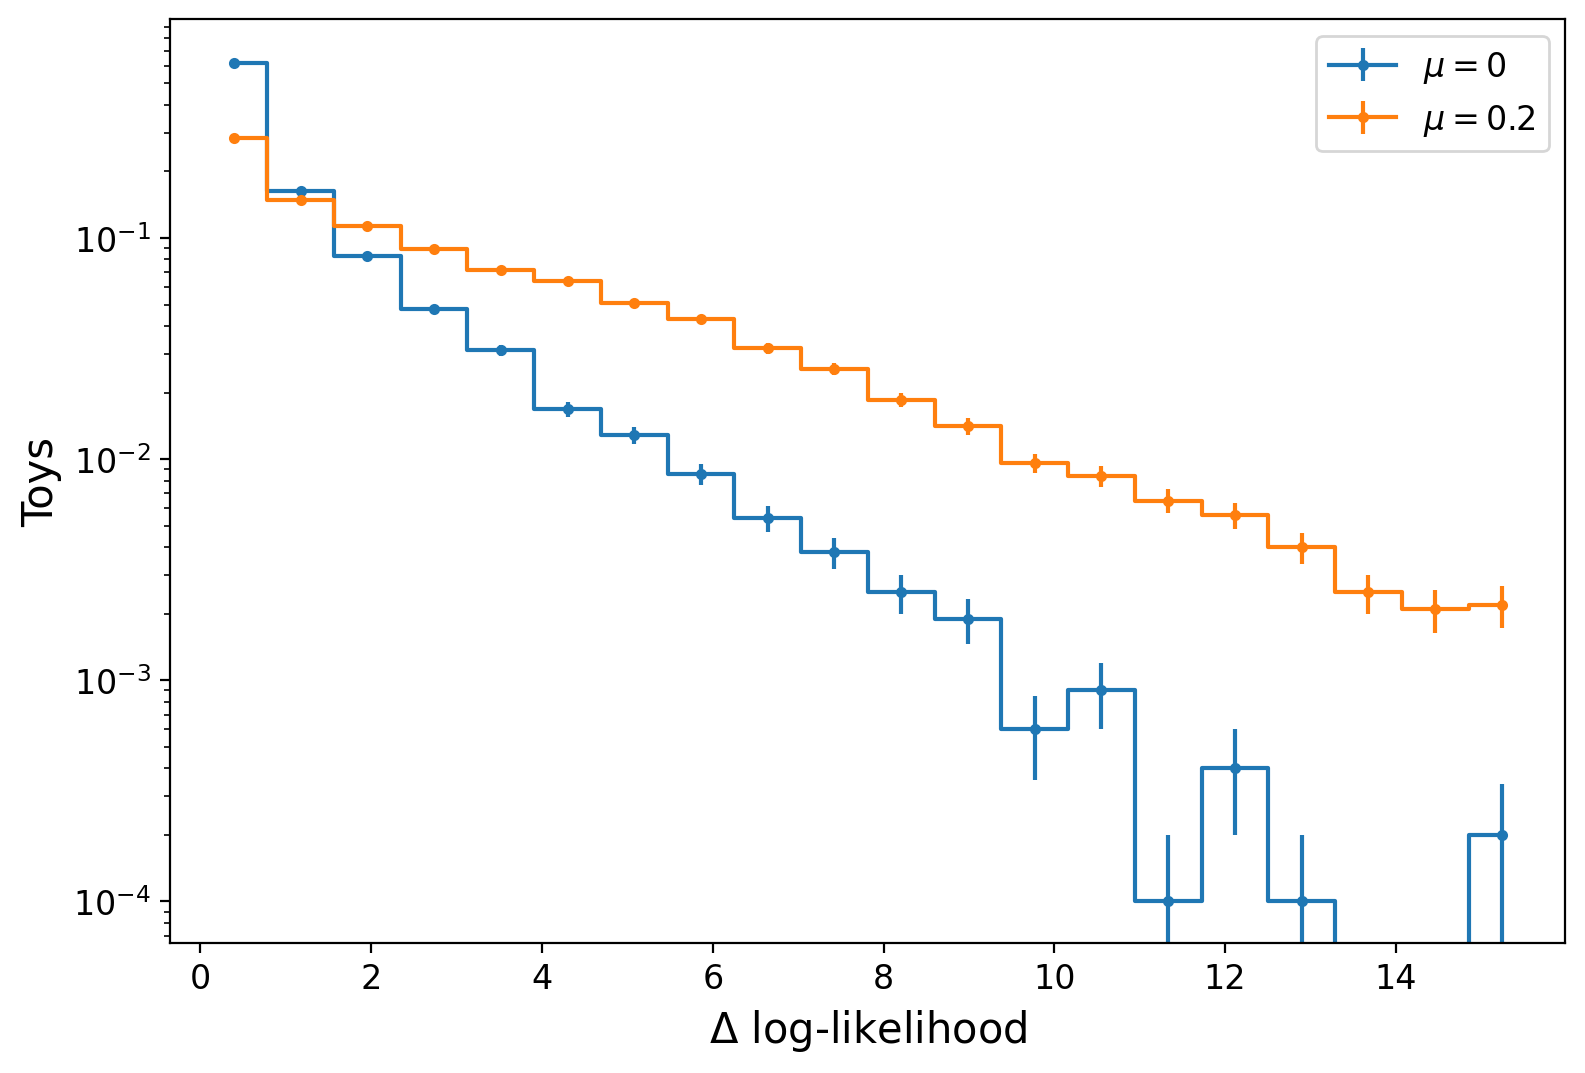

In [13]:
#>>>RUN: L11.2-runcell01

np.random.seed(41)

def sampleGaus(iMean,iNToy=10000):
    ntoys=iNToy
    deltaLL=[]
    for i0 in range(ntoys):
        testsamples1 = np.random.normal(iMean,1, 50)
        hypoth=loglikelihoodGaus(testsamples1,0) #compute with a fixed mean of 0
        null  =loglikelihoodGaus(testsamples1) #compute with mean floating
        val=hypoth-null
        deltaLL.append(-2*val)
    return deltaLL

deltaLL1 = sampleGaus(0)
deltaLL2 = sampleGaus(0.2)

y1, bin_edges = np.histogram(deltaLL1, bins=20)
y2, bin_edges = np.histogram(deltaLL2, bins=bin_edges)

#Now plot a chi2 with 1 dof
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])

#And Draw
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fast')
plt.errorbar(bin_centers,y1/len(deltaLL1),yerr=y1**0.5/len(deltaLL1),marker='.',drawstyle = 'steps-mid',label='$\mu=0$')
plt.errorbar(bin_centers,y2/len(deltaLL2),yerr=y2**0.5/len(deltaLL2),marker='.',drawstyle = 'steps-mid',label='$\mu=0.2$')
plt.xlabel("$\Delta$ log-likelihood")
plt.ylabel("Toys")
ax.set_yscale('log')
plt.legend()
plt.show()

<h3>Delta log-likelihood and Chi-square</h3>

As introduced in the previous section, the difference in the log-likelihoods of two models is approximately chi-square distributed. Therefore, comparing the observed delta log-likelihood distribution to a chi-square distribution with the appropriate number of degrees of freedom, we can test the null hypothesis that the two models ($\mu=0$ and $\mu$ allowed to float) are equally good fits to the data.

Below, we plot a chi-square function with one degree of freedom, and show that it fits the delta log-likelihood calculated for the data sampled from a Gaussian distribution with $\mu=0$. In this case, we chose one degree of freedom because the only difference between the two models is that one additional parameter is allowed to vary.

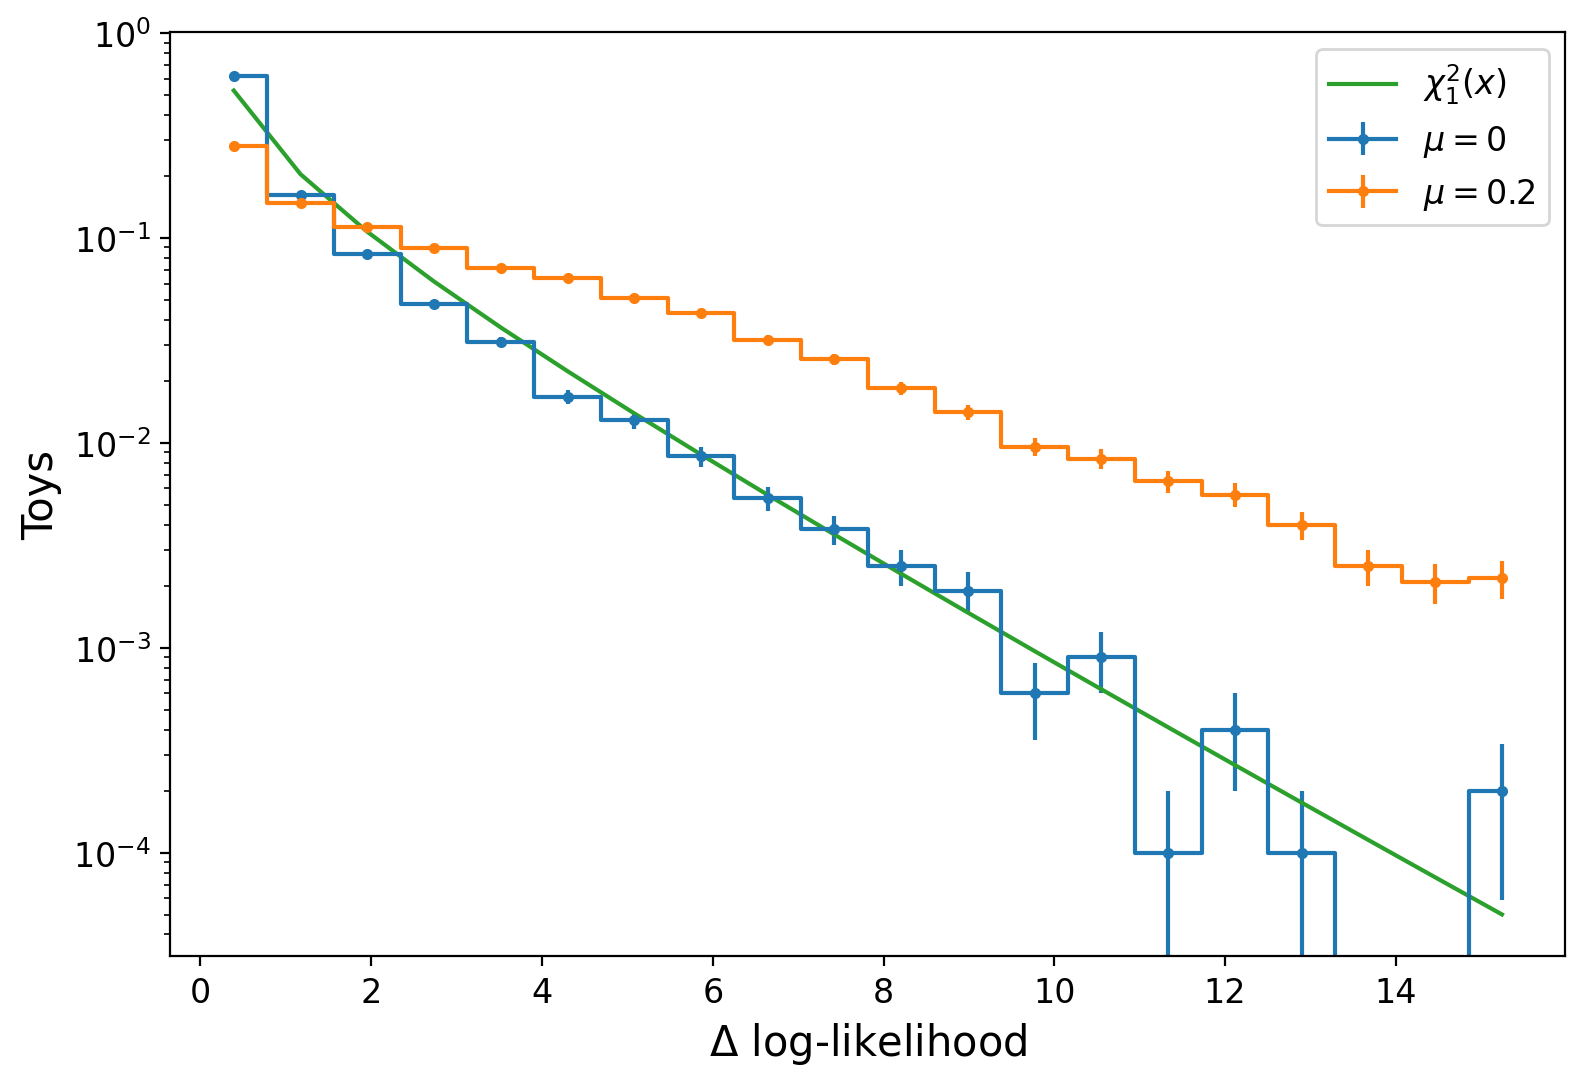

In [14]:
#>>>RUN: L11.2-runcell02

np.random.seed(41)

#Now plot a chi2 with 1 dof
chi2 = []
for x in bin_centers:#range(len(bin_centers)):
    chi2val=stats.chi2.pdf(x, 1)
    chi2.append(chi2val)

#And Draw
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fast')
plt.errorbar(bin_centers,y1/len(deltaLL1),yerr=y1**0.5/len(deltaLL1),marker='.',drawstyle = 'steps-mid',label='$\mu=0$')
plt.errorbar(bin_centers,y2/len(deltaLL2),yerr=y2**0.5/len(deltaLL2),marker='.',drawstyle = 'steps-mid',label='$\mu=0.2$')
plt.plot(bin_centers,chi2,label='$\chi^{2}_{1}(x)$')
plt.xlabel("$\Delta$ log-likelihood")
plt.ylabel("Toys")
ax.set_yscale('log')
plt.legend()
plt.show()

<h3>Returning to the original data</h3>

So, in the above code, we ran 10000 simulations of the data in order to see that the delta log-likelihood for the `mu=0` data exactly followed a chi-square distribution with one degree of freedom. But what if we only have one data set (not 10000 toys)? How do we interpret the delta log-likelihood?

Well, below we compute the delta log-likelihood for `testSamplesA` and test the hypothesis that the mean is 0, and do the same for `testSamplesB`. We see that the deltaLL for `testSamplesA` is small, and that the corresponding probability of this occuring is very high.

On the other hand, the deltaLL for `testSamplesB` is larger, and the probability is much smaller.

In summary, if your delta log-likelihood value is greater than what is expected from the appropriate chi-square distribution, it most likely means that the data is not well described by the model being tested.

In [15]:
#>>>RUN: L11.2-runcell03

#let's try to understand the deltaLL values
#of the distributions we defined earlier

np.random.seed(5)

testSamplesA = np.random.normal(0  ,1, 50)
testSamplesB = np.random.normal(0.2,1, 50)

hypoth=loglikelihoodGaus(testSamplesA,0) #compute with a fixed mean of 0
null  =loglikelihoodGaus(testSamplesA) #compute with mean floating
deltaLL = -2.*(hypoth-null)
print('deltaLL testSamplesA:', deltaLL)

hypoth=loglikelihoodGaus(testSamplesB,0) #compute with a fixed mean of 0
null  =loglikelihoodGaus(testSamplesB) #compute with mean floating
deltaLL = -2.*(hypoth-null)
print('deltaLL testSamplesB:', deltaLL)

deltaLL testSamplesA: 0.6442127020828394
deltaLL testSamplesB: 3.887942202853594


As expected, the delta log-likelihood for the sample generated using $\mu=0$ is smaller. However, as you can see from the two probability distributions, it is possible (although unlikely) that two such randomly generated samples would show a larger delta log-likelihood for the one with $\mu=0$.

<a name='exercises_11_2'></a>     

| [Top](#section_11_0) | [Restart Section](#section_11_2) | [Next Section](#section_11_3) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-11.2.1</span>

In the first plot in this section, why is the orange histogram (calculated from a distribution with `mu=0`) above the blue histogram (calculated from a distribution with `mu=0.2`)?

A) The orange data is well described by the model with `mu=0.2`\
B) There are systematic errors or biases in the orange data\
C) The model being tested is overfitting the orange data\
D) The orange data is not well described by the model with `mu=0`

<a name='section_11_3'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L11.3 A More Realistic Example</h2>  

| [Top](#section_11_0) | [Previous Section](#section_11_2) | [Exercises](#exercises_11_3) | [Next Section](#section_11_4) |


*The material in this section is discussed in the video **<a href="https://courses.mitxonline.mit.edu/learn/course/course-v1:MITxT+8.S50.2x+1T2025/block-v1:MITxT+8.S50.2x+1T2025+type@sequential+block@seq_LS11/block-v1:MITxT+8.S50.2x+1T2025+type@vertical+block@vert_LS11_vid3" target="_blank">HERE</a>.** You are encouraged to watch that video and use this notebook concurrently.*

<h3>Overview</h3>

Now, let's consider doing our test with a more realistic example. What if we want to quote the significance of an excess on top of a background? Let's take a look at what this would look like by making some toy data with a Gaussian bump on top of a flat background. You can uncomment the two plot commands and the legend command to show the two separate components along with the total data.

You can also try commenting out the first `np.random.normal` line and uncommenting the second one to see what the situation looks like when the Gaussian bump has fewer events. However, if you do that, be sure to rerun the original code as this data is used again in later code cells.

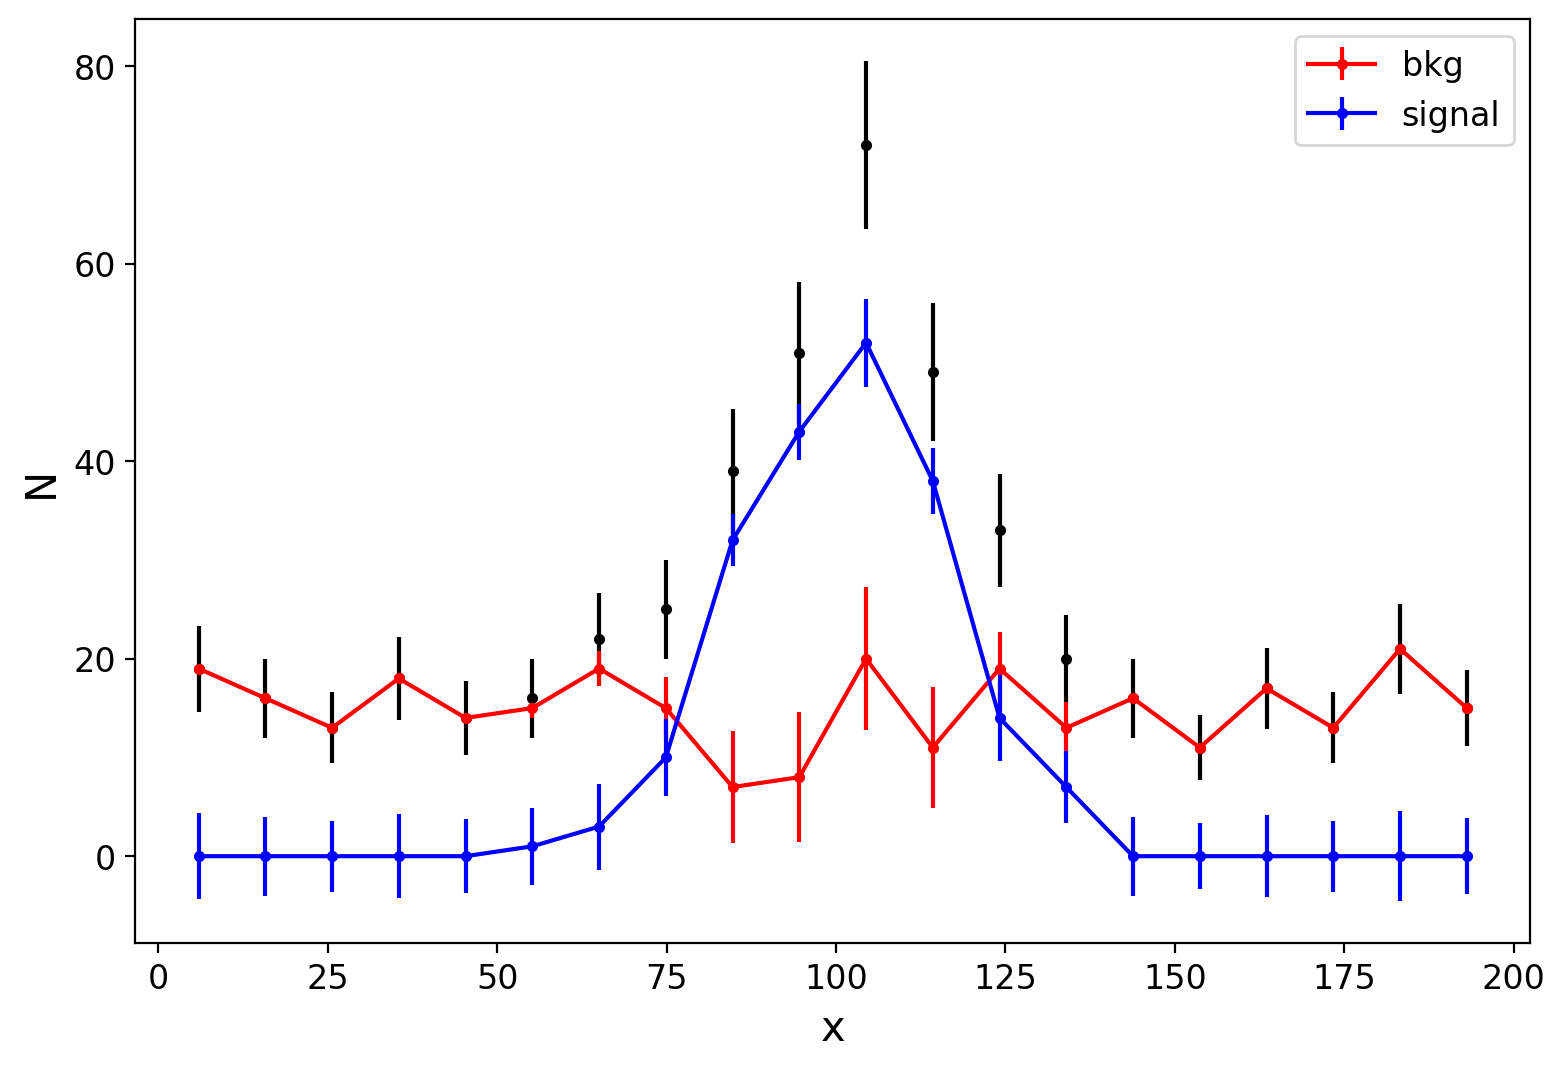

In [16]:
#>>>RUN: L11.3-runcell01

np.random.seed(42)

#First let's make a data sample and fit it
bkg = np.random.uniform(0,200, 300)
sig = np.random.normal (100,15,200) #choose different options for the number of signal events
#sig = np.random.normal (100,15,80)
data = np.append(sig,bkg)
y, bin_edges = np.histogram(data, bins=20)
ys, bin_edges = np.histogram(sig, bins=bin_edges)
yb, bin_edges = np.histogram(bkg, bins=bin_edges)

bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
plt.errorbar(bin_centers, y,yerr= y**0.5,marker='.',linestyle = 'None', color = 'black')
plt.errorbar(bin_centers,yb,yerr=ys**0.5,marker='.',linestyle = '-', color = 'red',label='bkg')
plt.errorbar(bin_centers,ys,yerr=yb**0.5,marker='.',linestyle = '-', color = 'blue',label='signal')
plt.legend()
plt.xlabel("x")
plt.ylabel("N")
plt.show()


Let's try to fit this distribution with a bump. For this, we can define the two fit functions:

**Null hypothesis:** Our fit function is a flat constant background with a Gaussian signal on top of it.

$$
\begin{equation}
f(x|C,\mu\,\sigma) = C + \mathcal{N}(x,\mu,\sigma)
\end{equation}
$$

**Alternative hypothesis:** Our fit function is just a flat constant background with no excess.


$$
\begin{equation}
f(x|C) = C
\end{equation}
$$

For each of these, we can define the likelihood by summing over our $N$ bins with value $x_{i}$ and number of events $y_{i}$ and treating the number of events in each bin as an independent Gaussian with an uncertainty given by $\sigma_{i}=\sqrt{y_{i}}$. We can write the total likelihood and log-likelihood for the total dataset as:

$$
\begin{eqnarray}
 \mathcal{L}(\theta_{i} | x_{i},y_{i}) & = & \prod_{i=0}^{N}\frac{1}{\sqrt{2\pi\sigma_{i}^{2}}}\exp\left(-\sum_{i=0}^{N} \frac{(y_{i}-f(x_{i}|\theta_{i})^2}{2\sigma_{i}^{2}}\right) \\
 \log\left(\mathcal{L}(\theta_{i} | x_{i},y_{i})\right) & = &  -\sum_{i=0}^{n}\log\left(2\pi\sigma_{i}^{2}\right) - \sum_{i=0}^{N} \frac{(y_{i}-f(x_{i}|\theta_{i}))^2}{2\sigma_{i}^{2}}
\end{eqnarray}
$$

Our log-likelihood ratio is then just the difference between the two log-likelihoods where we replace $f(x)$ with the appropriate hypothesis. Let's write this all out in lmfit and do the calculation.




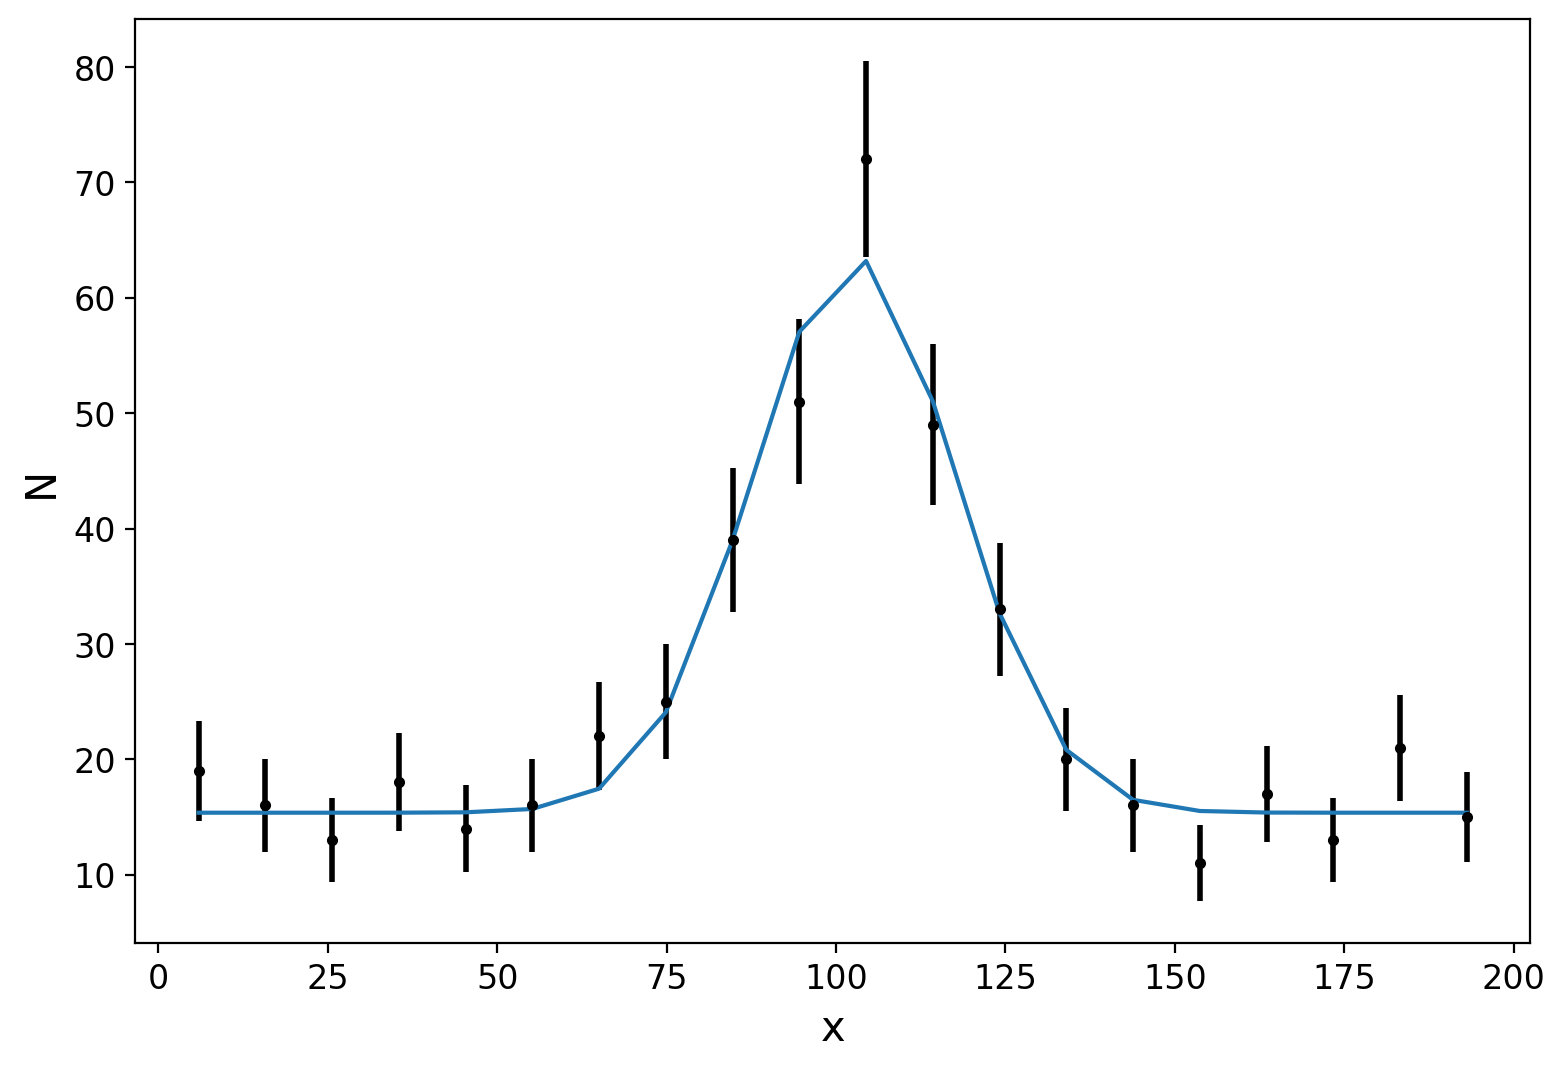

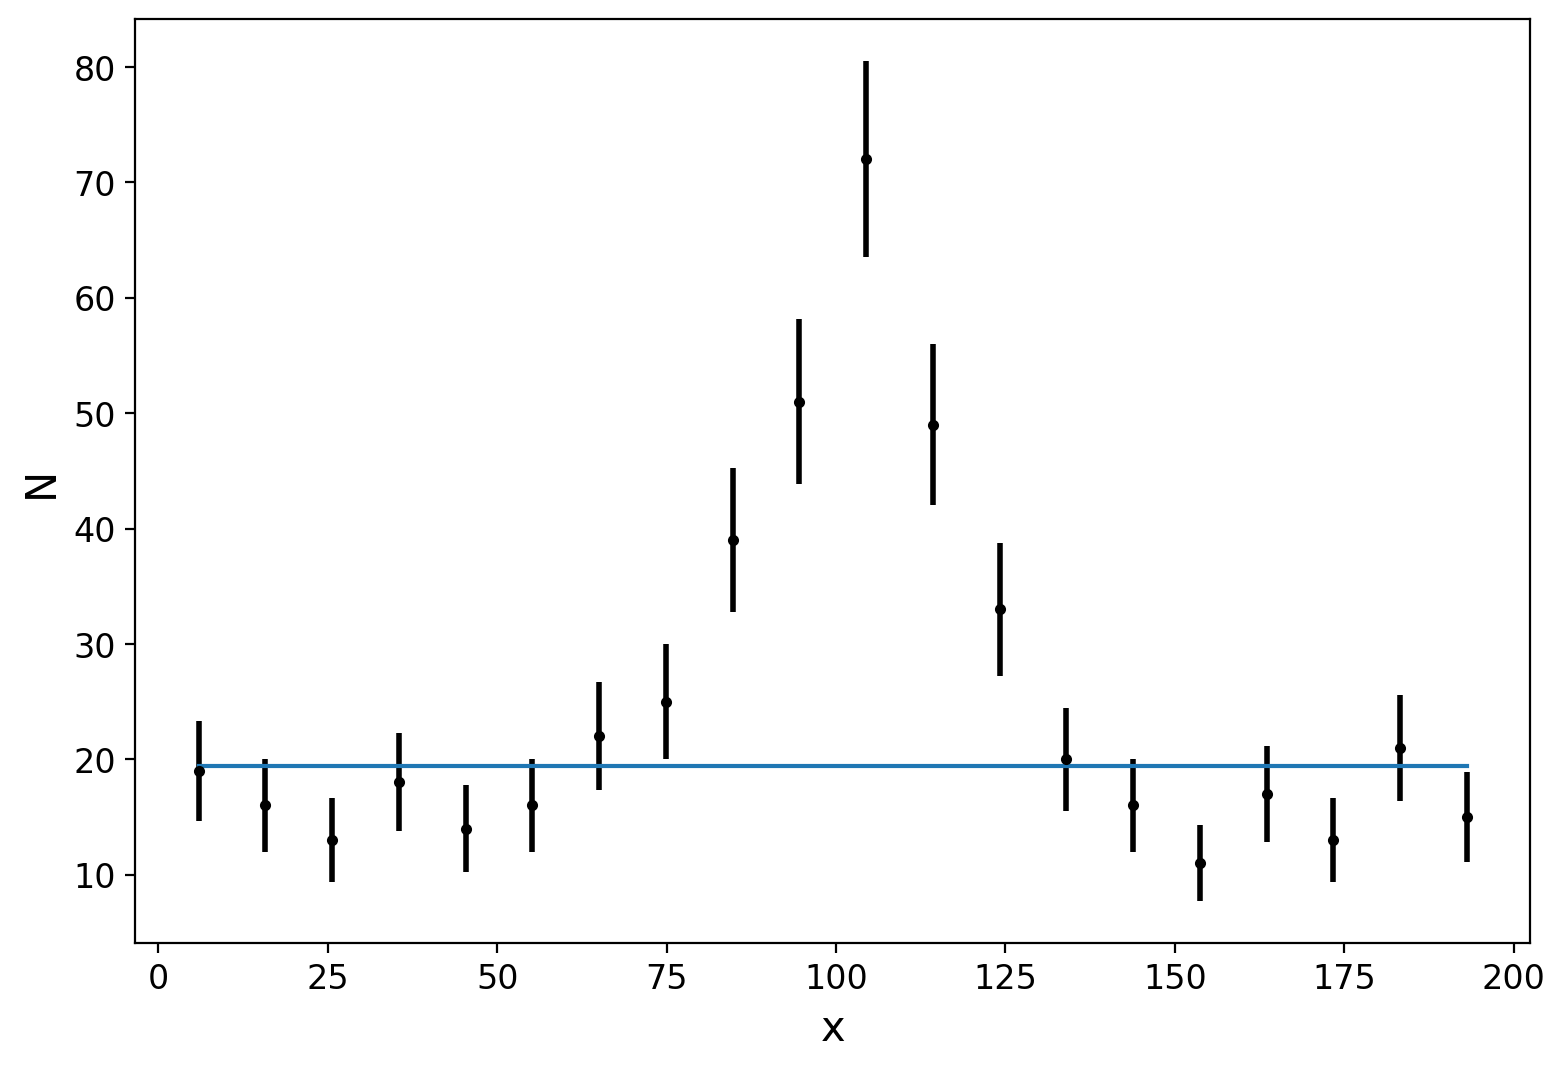

Delta negative log-likelihood: 51.604631889029065


In [17]:
#>>>RUN: L11.3-runcell02

from scipy.stats import norm
import lmfit

def fNull(params,x):
    val = norm.pdf(x,params["mu"],params["sigma"])
    return params["amp"]*val + params["c"]

def fAlt(params,x):
    return params["c"]*(x+1)/(x+1) #hack to output array

def binnedLikelihood(params, x, ydata, weights, func):
    y_model= func(params,x)
    residarr = np.sqrt(((y_model - ydata)/(2*weights))**2 + np.log(2*np.pi*weights**2))
    return residarr

def fitData(iX,iY,iFunc,iPlot=False):
    params = lmfit.Parameters()
    params.add('c',    value=1,min=0,max=np.inf)
    params.add('mu',   value=100,min=0,max=200)
    params.add('sigma',value=10,min=0,max=200)
    params.add('amp',  value=20,min=0,max=np.inf)
    result = lmfit.minimize(binnedLikelihood, params, args=(iX,iY,(iY**0.5),iFunc))
    #lmfit.report_fit(result)
    if iPlot:
        #Now we plot it.
        plt.errorbar(iX, iY,np.sqrt(iY), lw=2,fmt=".k", capsize=0)
        plt.plot(iX,iFunc(result.params,iX))
        plt.xlabel("x")
        plt.ylabel("N")
        plt.show()
    return result.residual

def deltaNLL(x,y,iPlot=False):
    LLNull=fitData(x,y,fNull,iPlot)
    LLAlt=fitData(x,y,fAlt,iPlot)
    return 2.*(np.sum(LLAlt*LLAlt)-np.sum(LLNull*LLNull))

x=bin_centers
NLL = deltaNLL(x,y,True)
print("Delta negative log-likelihood:",NLL)

**Note:** In the corresponding video, the sample generating code is run without a random seed, so a different number is computed than when running the code cell above.

Ok, so we got a big delta log-likelihood. However, what is the significance of this?

Well, this is where we can invoke Wilks' Theorem. $\Delta \log(\mathcal{L})$ will be $\chi^{2}$ distributed if the null and alternative hypotheses give equivalent fits to the data. In this case, the $\chi^{2}$ distribution will be with $n_{\rm params~Null}-n_{\rm params~Alt}$ degrees of freedom, which is $3$ (i.e. the 3 Gaussian parameters $\mu$, $\sigma$, and the amplitude).

So, to understand the significance, we need to compute the chi-square p-value associated with this delta log-likelihood.

Now, to see what this would look like, we'll run a case where we *expect* to get $\chi^2_3$, namely 100 toy samples containing just background data.

Toy: 0  of  100
Toy: 50  of  100
Significance with 3 floating 0.9999999999636365


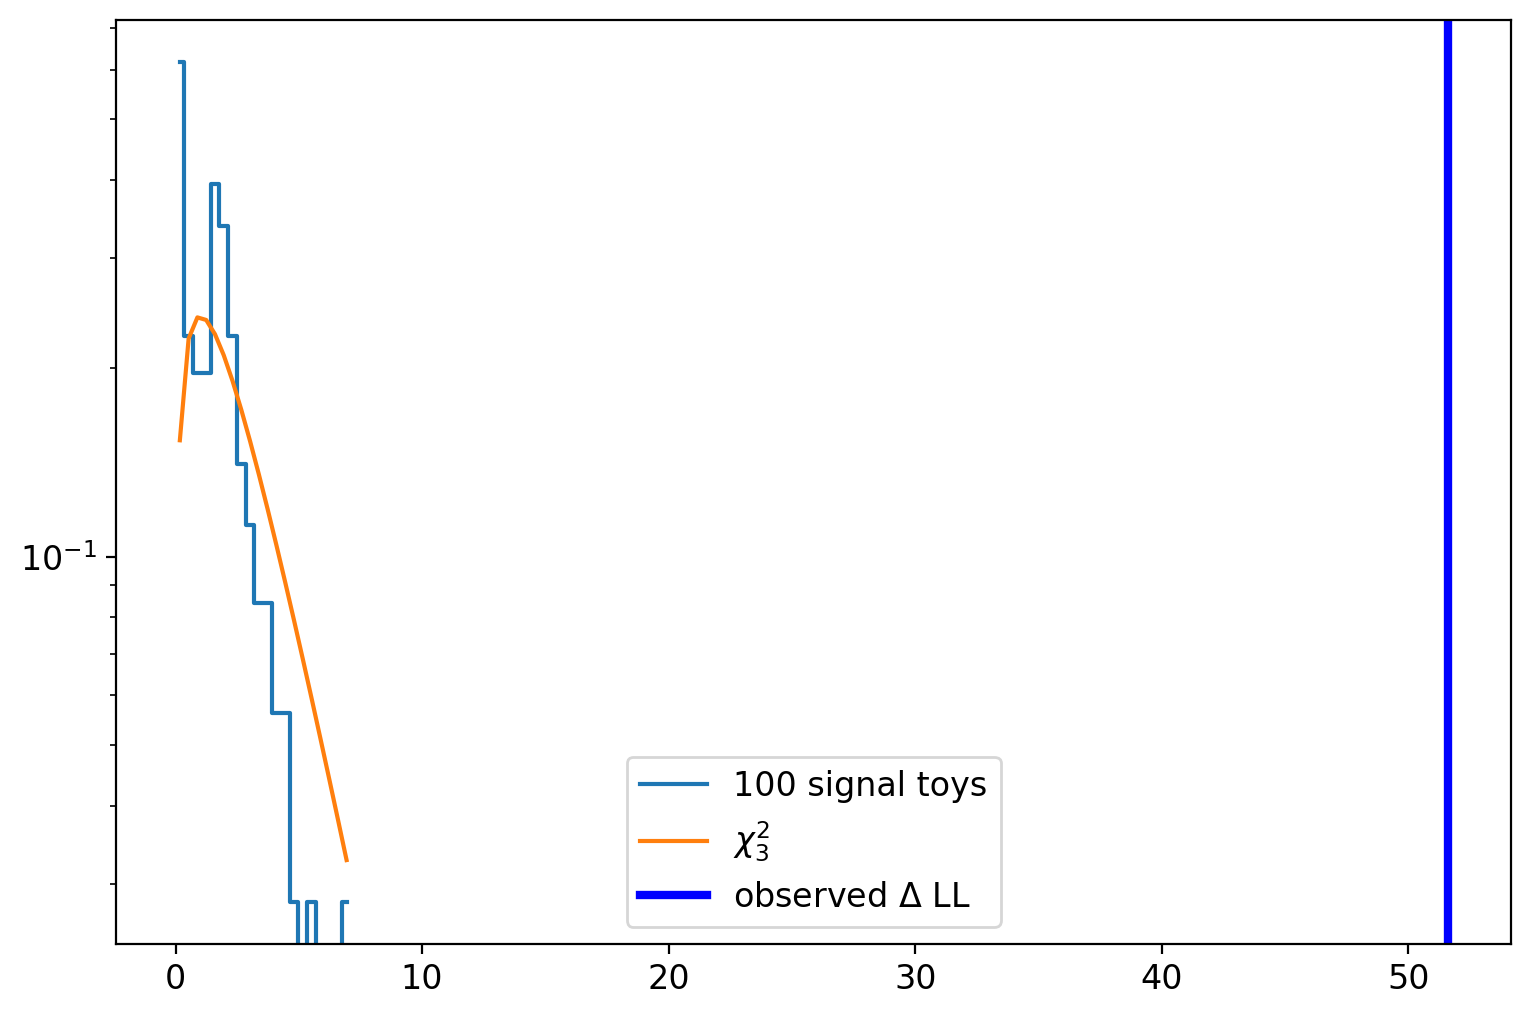

In [18]:
#>>>RUN: L11.3-runcell03

def toyNLL(iNEvents,iNToys,iBin_Edges):
    deltaNLLArr=np.array([])
    for i0 in range(iNToys):
        if i0 % 50 == 0: #change to output message more frequently, e.g., i0 % 10 == 0
            print("Toy:",i0," of ",iNToys)
        bkg = np.random.uniform(0,200, iNEvents)
        y, bin_edges = np.histogram(bkg, bins=iBin_Edges)
        x = 0.5*(bin_edges[1:] + bin_edges[:-1])
        nll = deltaNLL(x,y)
        deltaNLLArr=np.append(deltaNLLArr,nll)
    return deltaNLLArr

NLL1 = toyNLL(300,100,bin_edges) #adjust the number of runs as needed
ll1, ll_bin_edges = np.histogram(NLL1, bins=20,density=True)
ll_bin_centers = 0.5*(ll_bin_edges[1:] + ll_bin_edges[:-1])
chi21 = np.array([])
for x in ll_bin_centers:#range(len(bin_centers)):
    chi2val=stats.chi2.pdf(x, 3) #len is to normalize
    chi21 = np.append(chi21,chi2val)

fig, ax = plt.subplots(figsize=(9,6))
plt.plot(ll_bin_centers,ll1,drawstyle = 'steps-mid',label='100 signal toys')
plt.plot(ll_bin_centers,chi21,label='$\chi^{2}_{3}$')
ax.axvline(x=NLL,linewidth=3,c='b',label="observed $\Delta$ LL")
print("Significance with 3 floating",stats.chi2.cdf(NLL,3))
plt.legend()
plt.yscale('log')
plt.show()

As you can see, the delta log-likelihood we found for a data sample containing a bump is way beyond anything we would expect if there was only background.

<h3>Challenge question</h3>

The code below again fits the data sample with a bump, but now with a fixed value of $\mu$. How does the delta log-likelihood change? What if you change the fixed value of $\mu$, for example to 150?

Now that you have changed the definition of the function `fitData`, try rerunning the previous code that generated 100 samples with only the flat background. What $\chi^{2}$ distribution do you expect to see (you will answer this question in the next exercise)? Note that you can blow up the horizontal scale by commenting out the `ax.axvline` command.

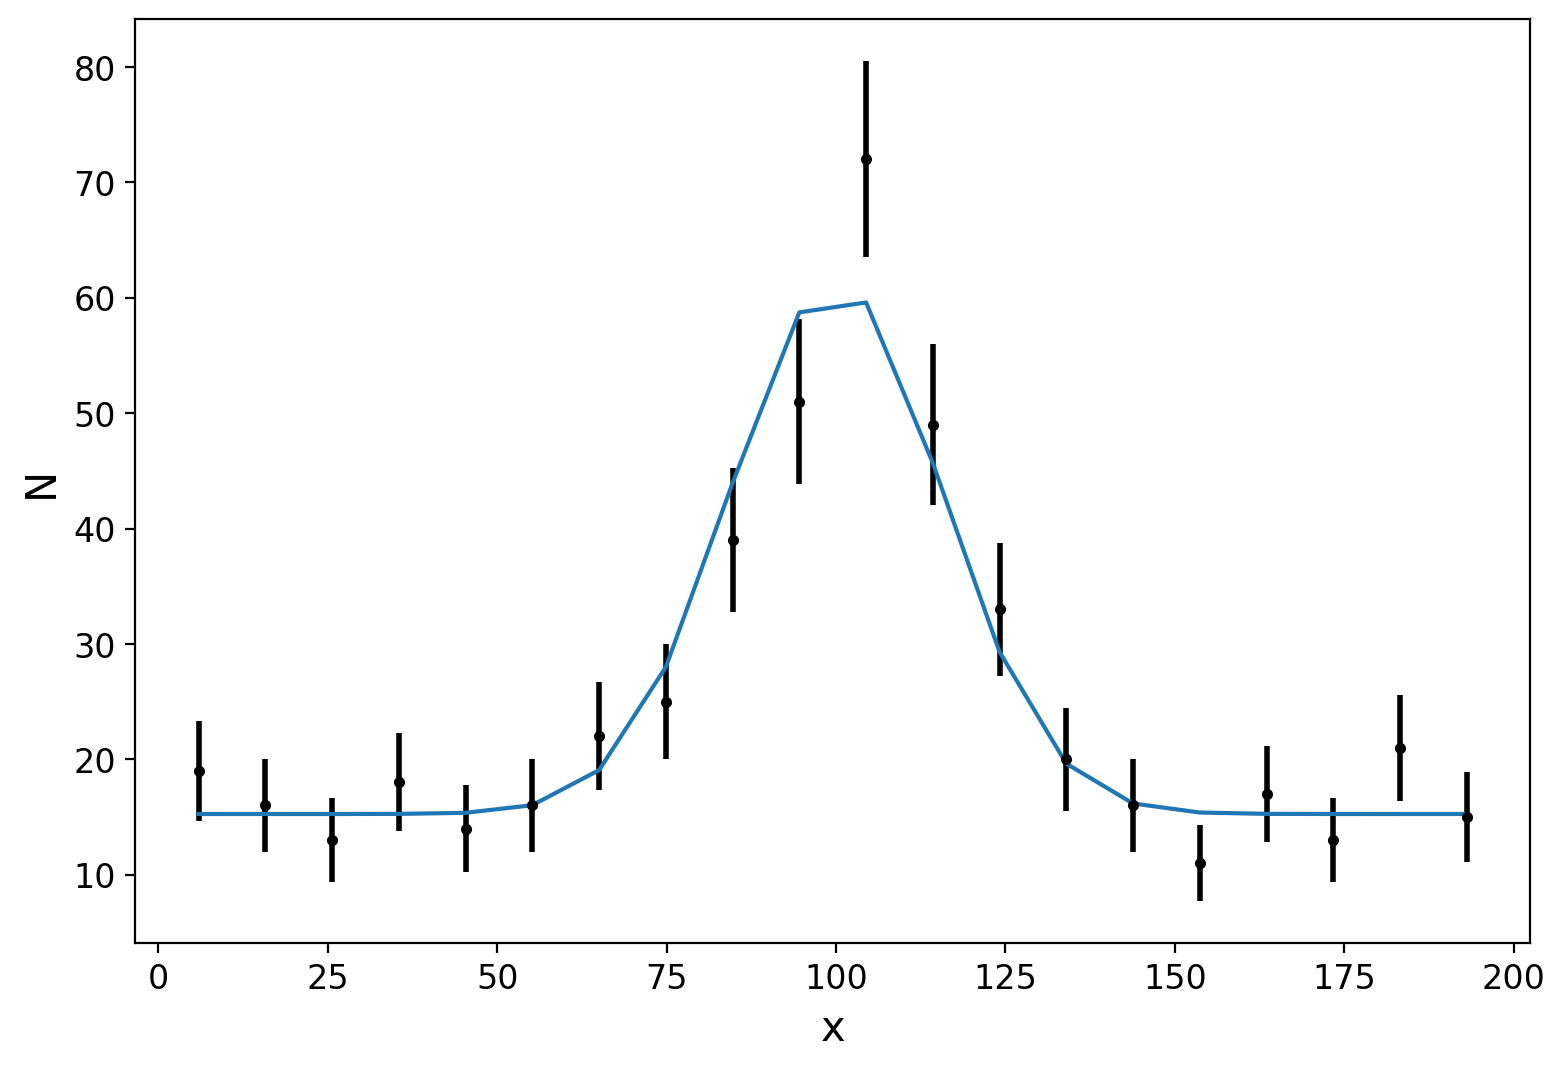

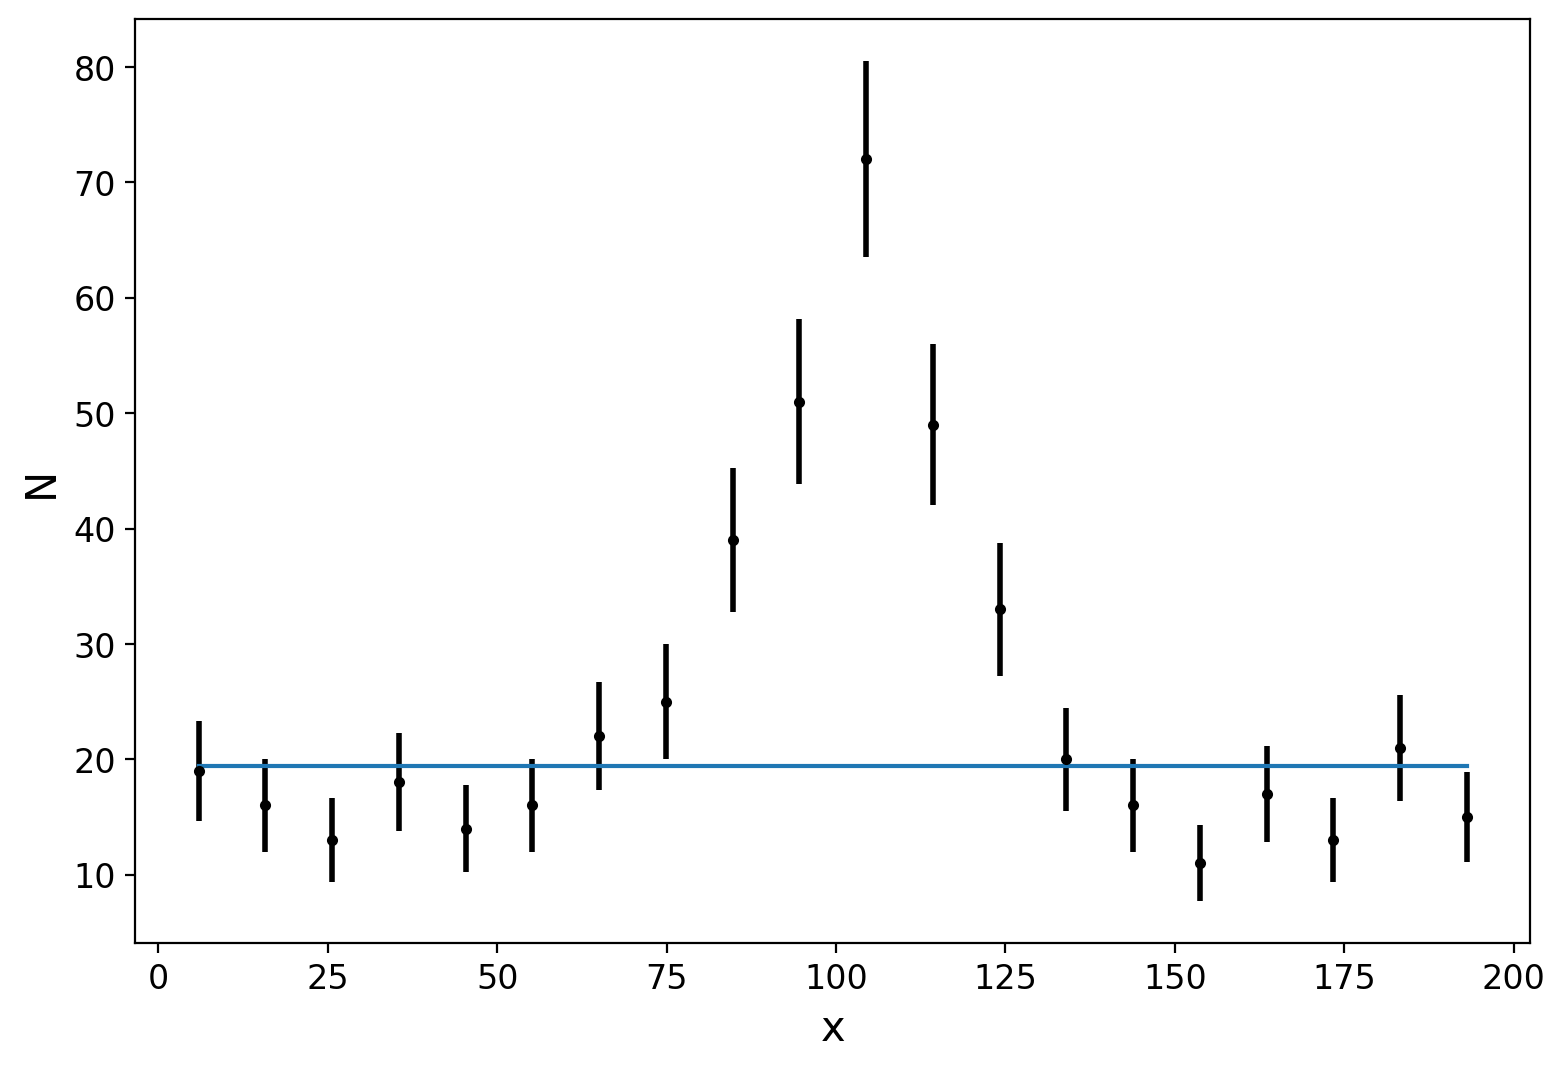

Delta negative log-likelihood: 50.41063451662751


In [19]:
#>>>RUN: L11.3-runcell04

#NOW WE FIX MU IN OUR FITTING PROCEDURE: params["mu"].vary = False

def fitData(iX,iY,iFunc,iPlot=False):
    params = lmfit.Parameters()
    params.add('c',    value=1,min=0,max=np.inf)
    params.add('mu',   value=100,min=0,max=200) #try changing the value of mu, when we are leaving it fixed
    params.add('sigma',value=10,min=0,max=200)
    params.add('amp',  value=20,min=0,max=np.inf)
    params["mu"].vary = False
    result = lmfit.minimize(binnedLikelihood, params, args=(iX,iY,(iY**0.5),iFunc))
    #lmfit.report_fit(result)
    if iPlot:
        #Now we plot it.
        plt.errorbar(iX, iY,np.sqrt(iY), lw=2,fmt=".k", capsize=0)
        plt.plot(iX,iFunc(result.params,iX))
        plt.xlabel("x")
        plt.ylabel("N")
        plt.show()
    return result.residual

def deltaNLL(x,y,iPlot=False):
    LLNull=fitData(x,y,fNull,iPlot)
    LLAlt=fitData(x,y,fAlt,iPlot)
    return 2.*(np.sum(LLAlt*LLAlt)-np.sum(LLNull*LLNull))

x=bin_centers
NLL = deltaNLL(x,y,True)
print("Delta negative log-likelihood:",NLL)

<a name='exercises_11_3'></a>     

| [Top](#section_11_0) | [Restart Section](#section_11_3) | [Next Section](#section_11_4) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-11.3.1</span>

How many degrees of freedom should we use when calculating the chi-square value associated with the delta log-likelihood, for the model where `mu` is a fixed parameter? Enter your answer as an integer.

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-11.3.2</span>

Scan the mean of the bump, and make a plot of delta log-likelihood vs mean. What are the features of this plot?

Specifically, complete the following code, which varies the parameter $\mu$ over the range `[60-140]` and generates a plot of `NLL` vs. $\mu$. Enter the value of $\mu$ that maximizes `NLL` as a number with precision 1e-1.

mu value that maximizes deltaNLL: 102.82828282828282


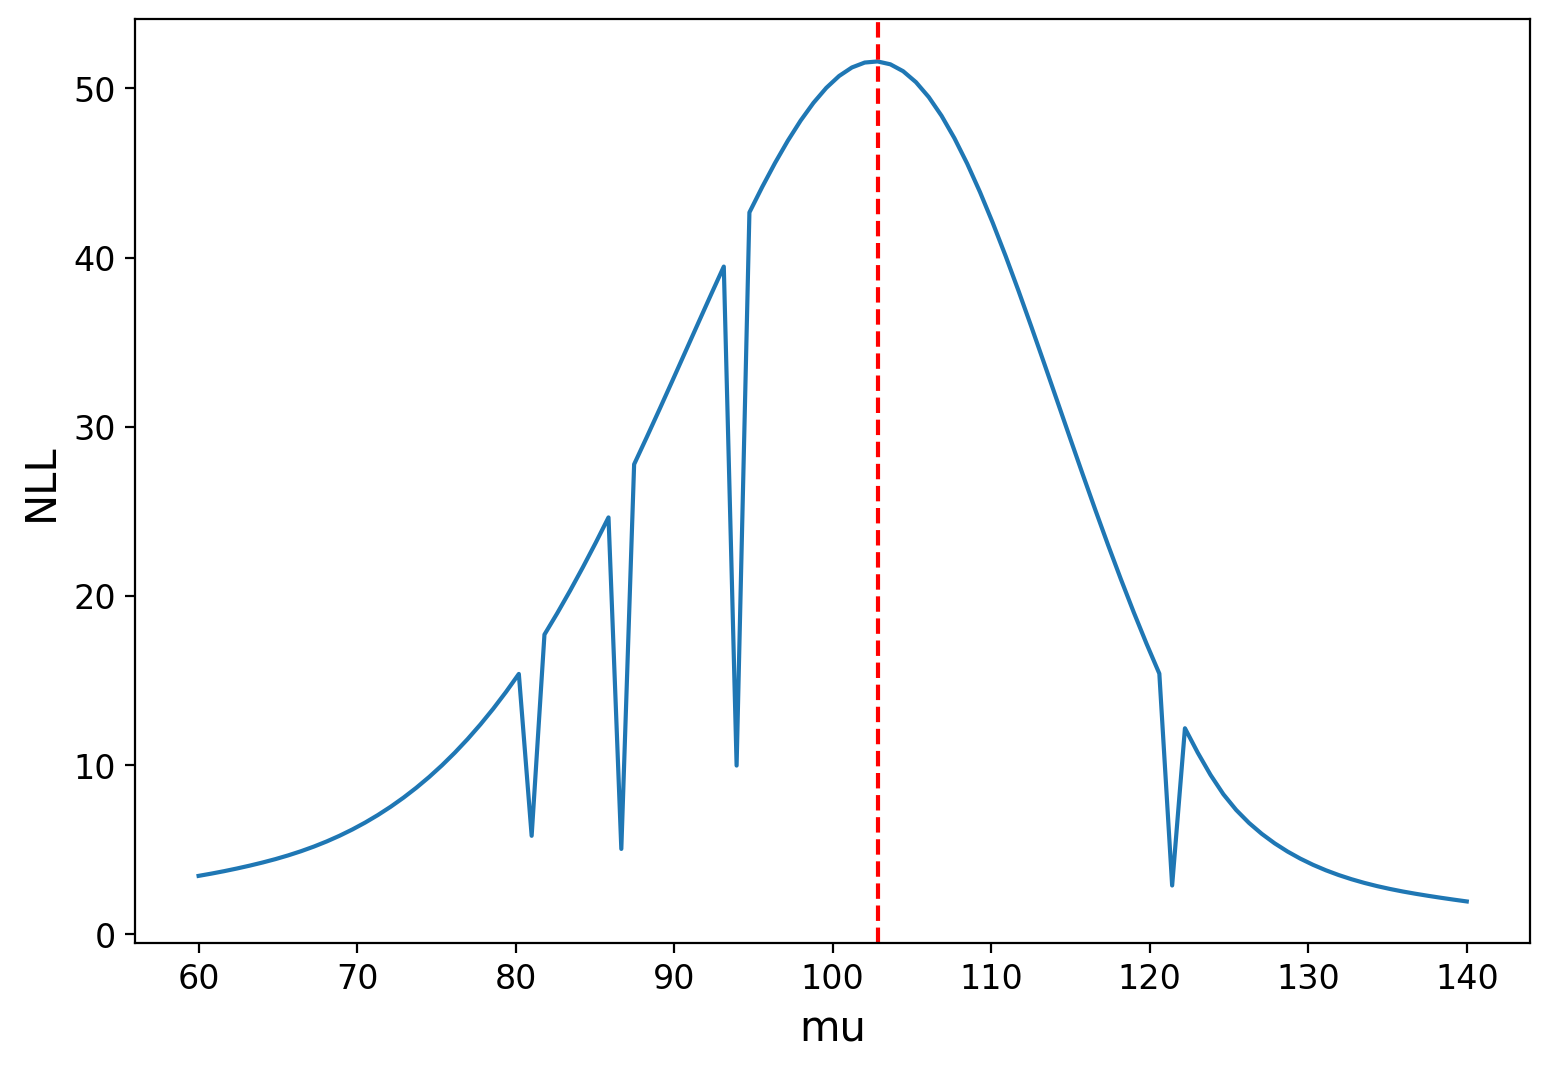

In [40]:
#>>>EXERCISE: L11.3.2
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

def fitData_vary_mu(iX,iY,iFunc,imu,iPlot=False):
    params = lmfit.Parameters()
    params.add('c',    value=1,min=0,max=np.inf)
    params.add('mu',   value=imu,min=0,max=200) #try changing the value of mu, when we are leaving it fixed
    params.add('sigma',value=10,min=0,max=200)
    params.add('amp',  value=20,min=0,max=np.inf)
    params["mu"].vary = False
    result = lmfit.minimize(binnedLikelihood, params, args=(iX,iY,(iY**0.5),iFunc))
    #lmfit.report_fit(result)
    if iPlot:
        #Now we plot it.
        plt.errorbar(iX, iY,np.sqrt(iY), lw=2,fmt=".k", capsize=0)
        plt.plot(iX,iFunc(result.params,iX))
        plt.xlabel("x")
        plt.ylabel("N")
        plt.show()
    return result.residual

def deltaNLL_vary_mu(x,y,imu,iPlot=False):
    LLNull=fitData_vary_mu(x,y,fNull,imu,iPlot)
    LLAlt=fitData_vary_mu(x,y,fAlt,imu,iPlot)
    return 2.*(np.sum(LLAlt*LLAlt)-np.sum(LLNull*LLNull))


n_points = 100  # number of points to sample between 60 and 140
imu_values = np.linspace(60, 140, n_points) # (sample n_points between 60 and 140)

# array to store NLL values
nll_values = list(map(lambda imu: deltaNLL_vary_mu(x,y,imu), imu_values))
# nll_values = []
# for i in range(n_points):
#   nll_values.append(deltaNLL_vary_mu(x,y,imu_values[i]))

# loop over imu values and calculate deltaNLL for each value
# store in nll_values
# e.g., for i, imu in ...


# find the value of imu that minimizes NLL (i.e., maximizes deltaNLL)
imu_max =  imu_values[np.argmax(nll_values)]
print("mu value that maximizes deltaNLL:", imu_max)

# plot NLL vs imu
plt.plot(imu_values, nll_values)
plt.axvline(imu_max, color='r', linestyle='--')
plt.xlabel("mu")
plt.ylabel("NLL")
plt.show()


<a name='section_11_4'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L11.4 Probability of Fit</h2>     

| [Top](#section_11_0) | [Previous Section](#section_11_3) | [Exercises](#exercises_11_4) | [Next Section](#section_11_5) |


*The material in this section is discussed in the video **<a href="https://courses.mitxonline.mit.edu/learn/course/course-v1:MITxT+8.S50.2x+1T2025/block-v1:MITxT+8.S50.2x+1T2025+type@sequential+block@seq_LS11/block-v1:MITxT+8.S50.2x+1T2025+type@vertical+block@vert_LS11_vid4" target="_blank">HERE</a>.** You are encouraged to watch that video and use this notebook concurrently.*

<h3>Overview</h3>

Now, we will calculate the p-value of the chi-square value that is related to the delta log-likelihood.

To summarize, the delta log-likelihood provides a measure of how much the data favors one model over another, and this information can be used to compute the probability of the chi-square value, which in turn provides a measure of how well the favored model fits the data.

A small p-value indicates that the chi-square value (or equivalently the delta log-likelihood) is unlikely to have arisen by chance.

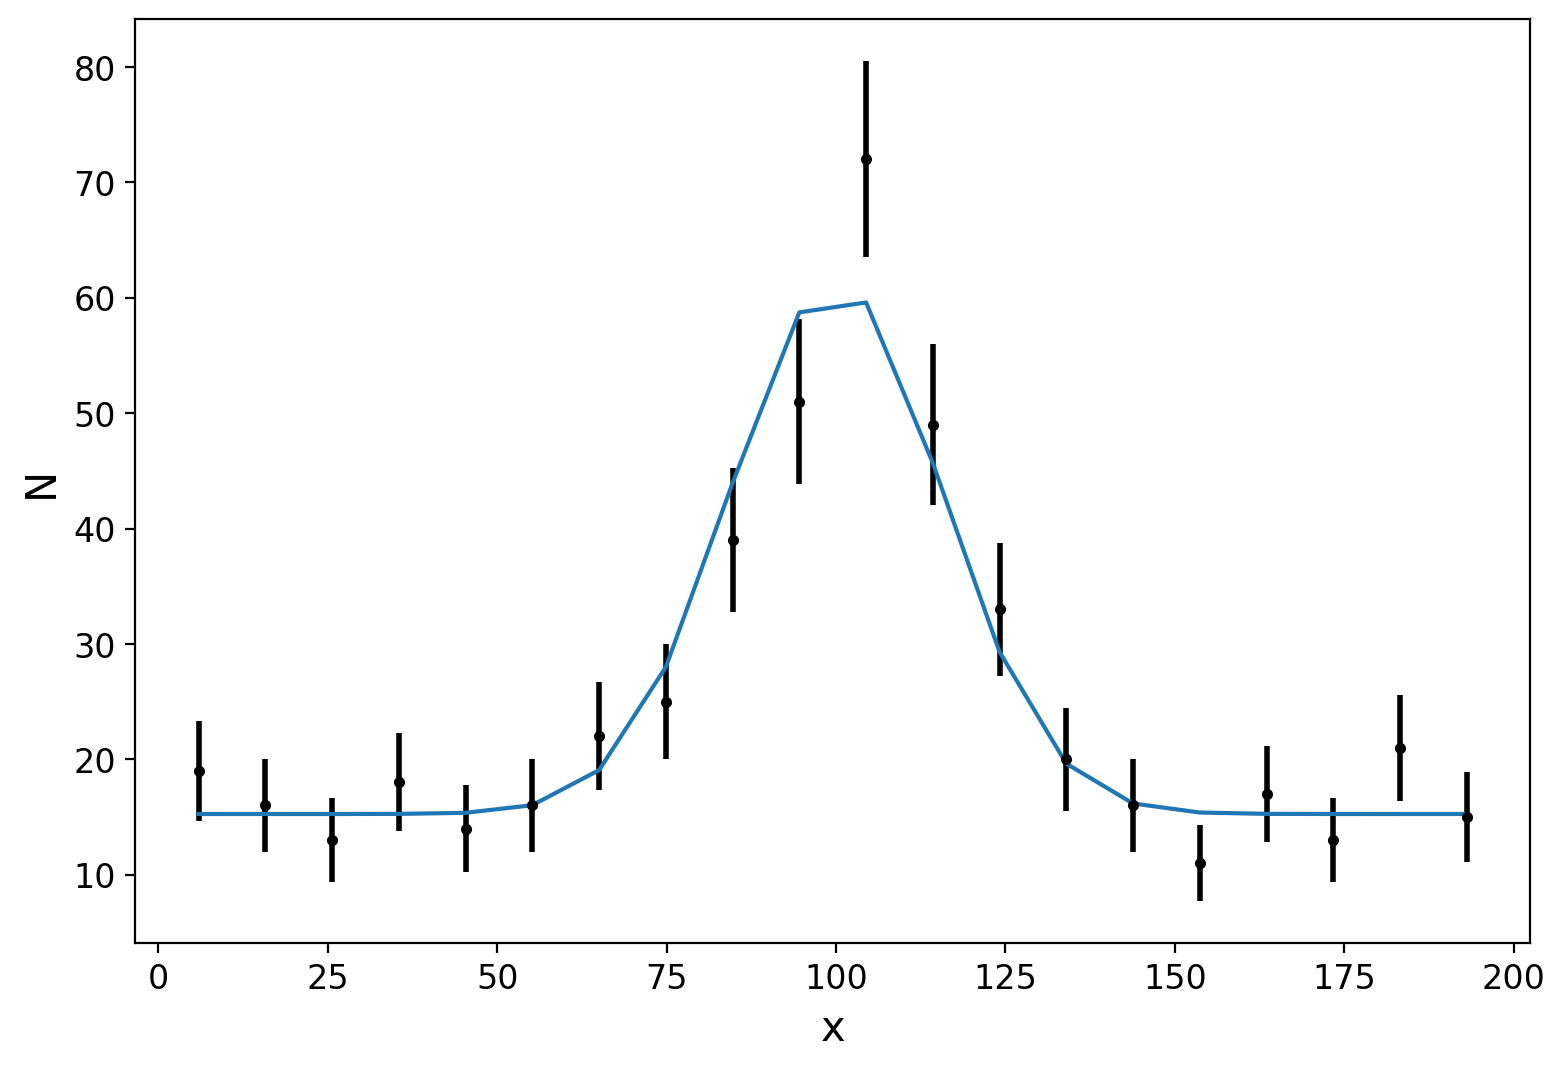

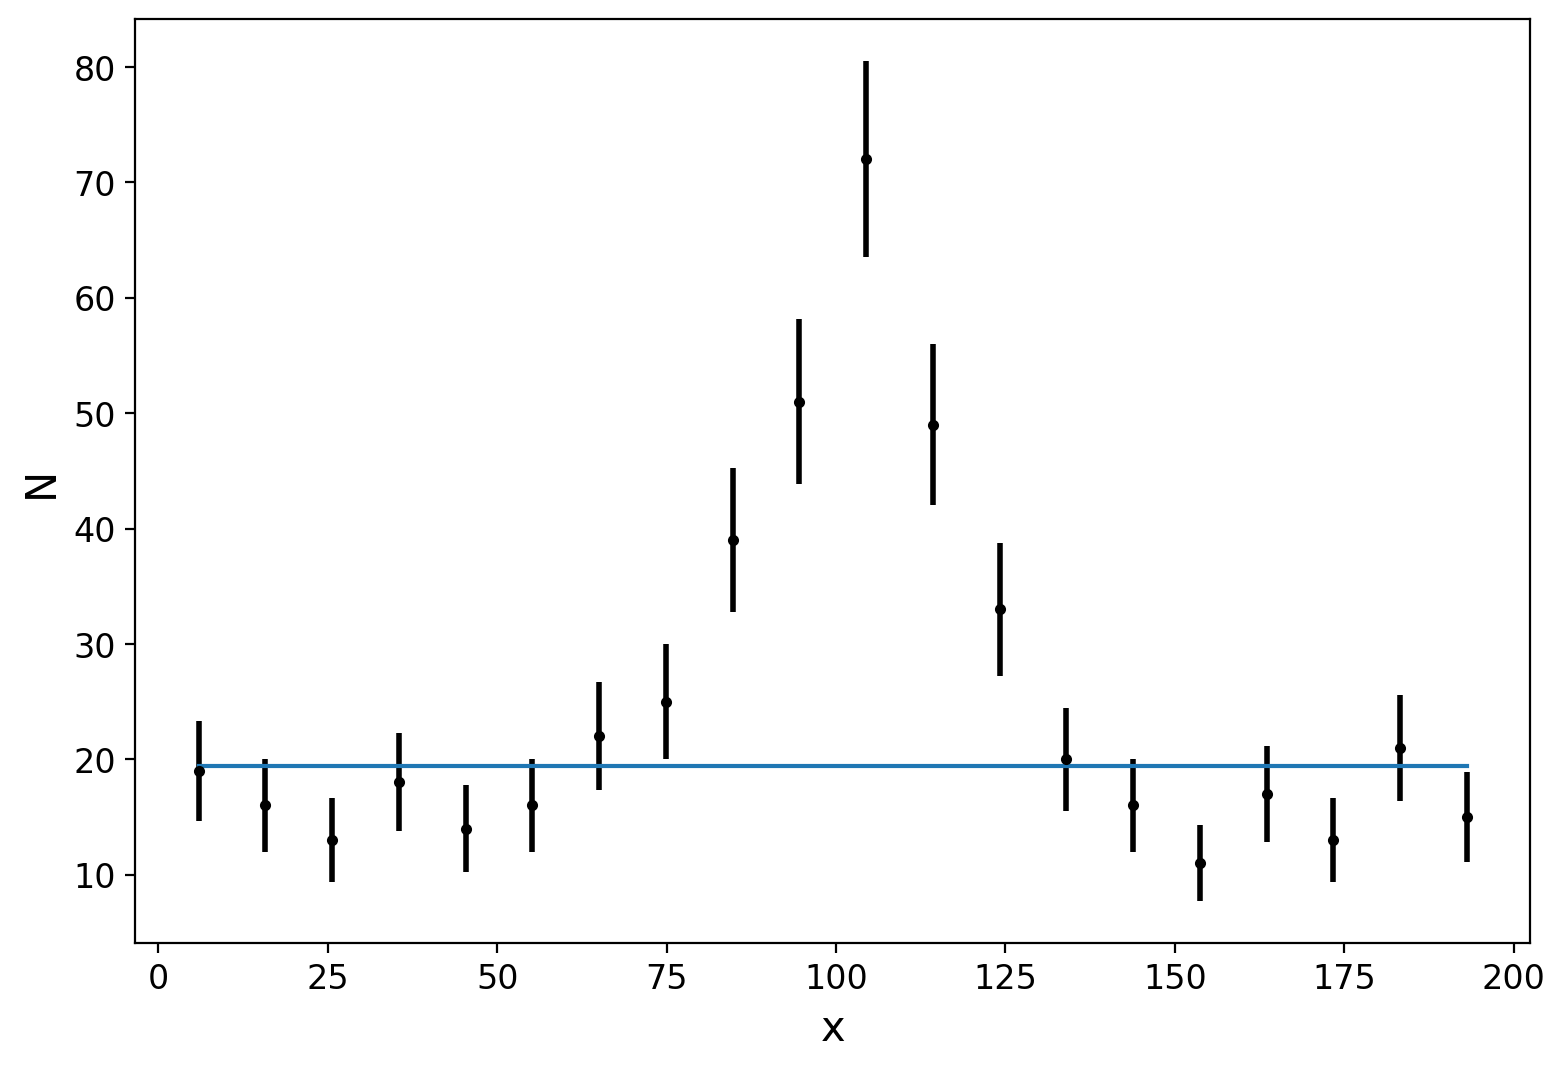

Delta negative Log Likelihood: 50.41063451662751
Our Probability of this happening 1.1310175018763857e-11


In [41]:
#>>>RUN: L11.4-runcell01

#HERE WE AGAIN DEFINE THE FUNCTIONS

def fitData(iX,iY,iFunc,iPlot=False):
    params = lmfit.Parameters()
    params.add('c',    value=1,min=0,max=np.inf)
    params.add('mu',   value=100,min=0,max=200) #try changing the value of mu, when we are leaving it fixed
    params.add('sigma',value=10,min=0,max=200)
    params.add('amp',  value=20,min=0,max=np.inf)
    params["mu"].vary = False
    result = lmfit.minimize(binnedLikelihood, params, args=(iX,iY,(iY**0.5),iFunc))
    #lmfit.report_fit(result)
    if iPlot:
        #Now we plot it.
        plt.errorbar(iX, iY,np.sqrt(iY), lw=2,fmt=".k", capsize=0)
        plt.plot(iX,iFunc(result.params,iX))
        plt.xlabel("x")
        plt.ylabel("N")
        plt.show()
    return result.residual

def deltaNLL(x,y,iPlot=False):
    LLNull=fitData(x,y,fNull,iPlot)
    LLAlt=fitData(x,y,fAlt,iPlot)
    return 2.*(np.sum(LLAlt*LLAlt)-np.sum(LLNull*LLNull))


x=bin_centers
NLL = deltaNLL(x,y,True)
print("Delta negative Log Likelihood:",NLL)

probability = 1-stats.chi2.cdf(NLL, 2)
print("Our Probability of this happening",probability)

As expected, the large delta log-likelihood value has a vanishingly small chance of happening when there are only 2 degrees of freedom. For fun, you could change the 2 in the probability calculation to something bigger to see how the results change.

In the example shown above, the bump was clearly visible by eye, so it's no surprise that assuming there is only a flat background fails miserably.

Now, try decreasing the signal amplitude. Run the cell below to set the signal amplitude to 10.

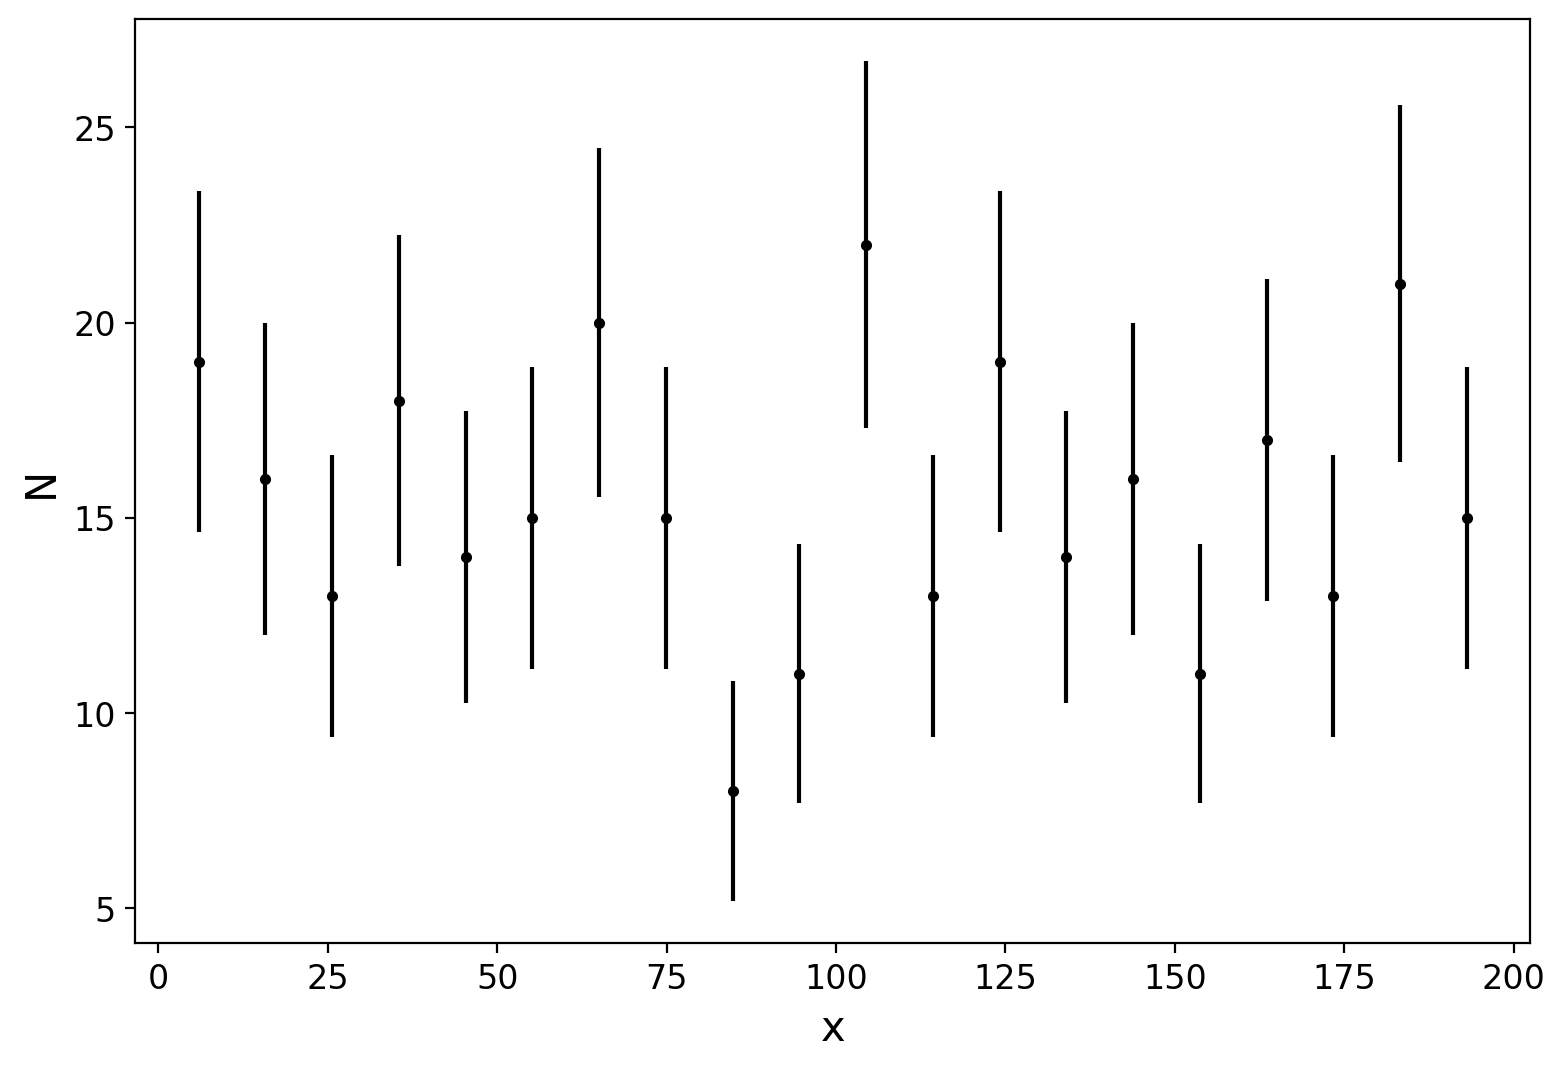

In [42]:
#>>>RUN: L11.4-runcell02

np.random.seed(42)

#First let's make a data sample and fit it
bkg = np.random.uniform(0,200, 300)
sig = np.random.normal (100,15,10) #choose different options for the number of signal events
data = np.append(sig,bkg)
y, bin_edges = np.histogram(data, bins=20)
ys, bin_edges = np.histogram(sig, bins=bin_edges)
yb, bin_edges = np.histogram(bkg, bins=bin_edges)

bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
plt.errorbar(bin_centers, y,yerr= y**0.5,marker='.',linestyle = 'None', color = 'black')
#plt.errorbar(bin_centers,yb,yerr=ys**0.5,marker='.',linestyle = '-', color = 'red',label='bkg')
#plt.errorbar(bin_centers,ys,yerr=yb**0.5,marker='.',linestyle = '-', color = 'blue',label='signal')
#plt.legend()
plt.xlabel("x")
plt.ylabel("N")
plt.show()


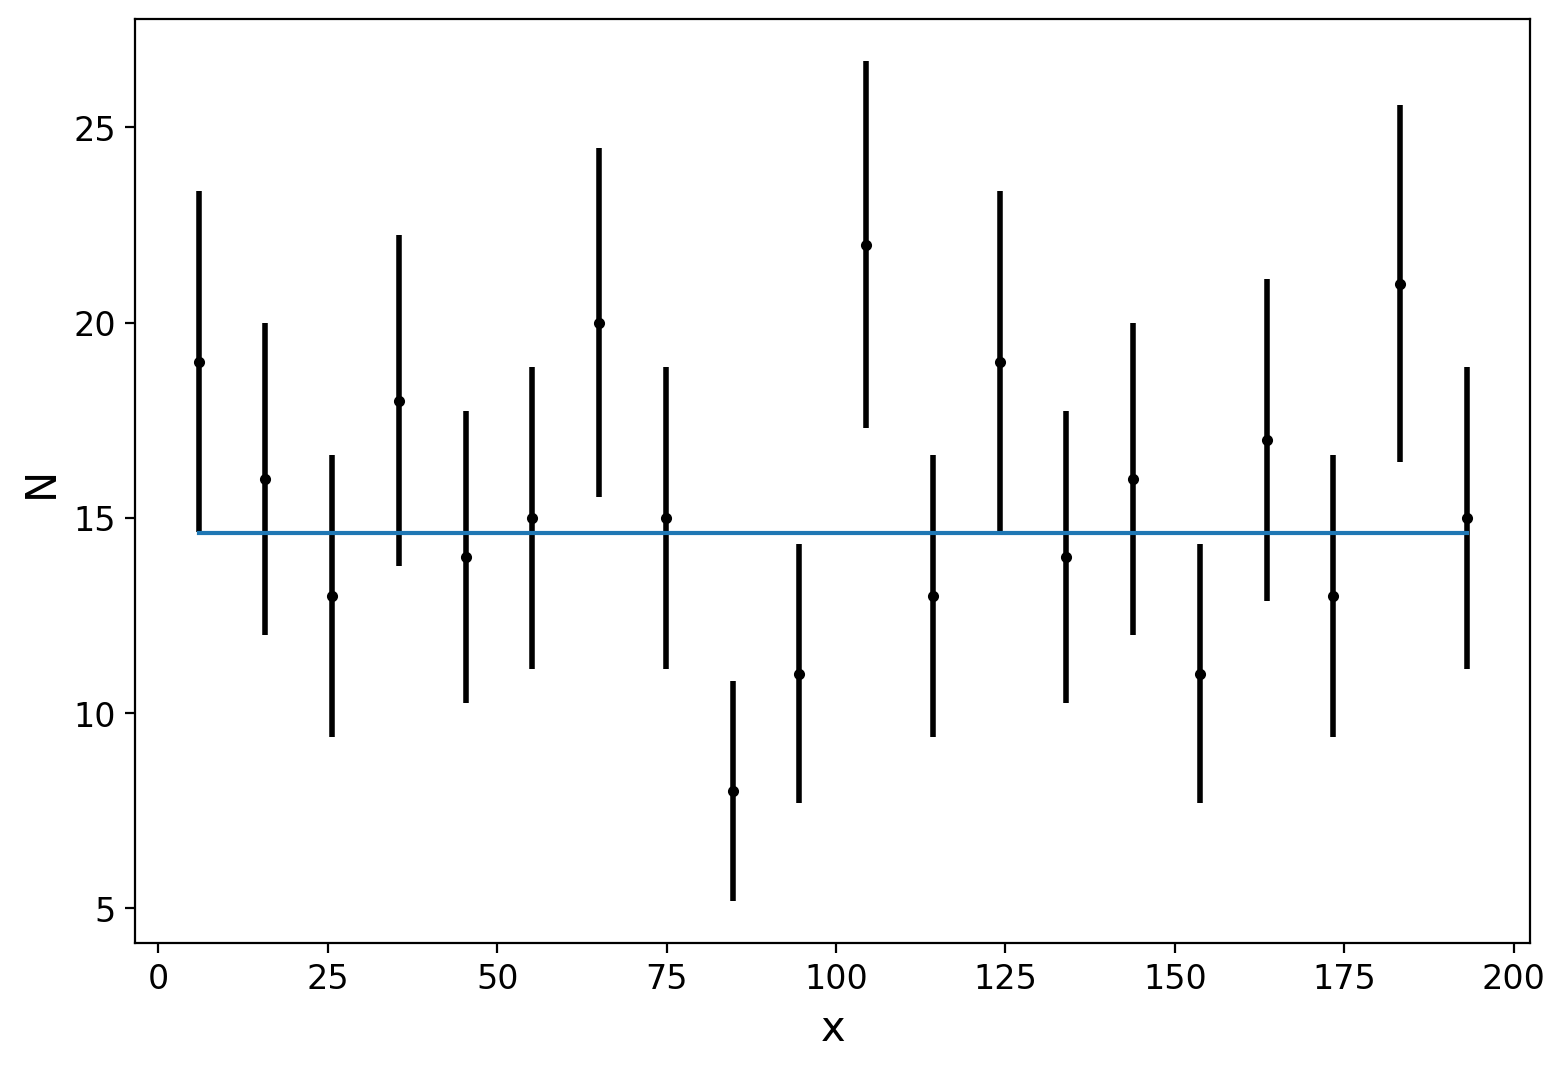

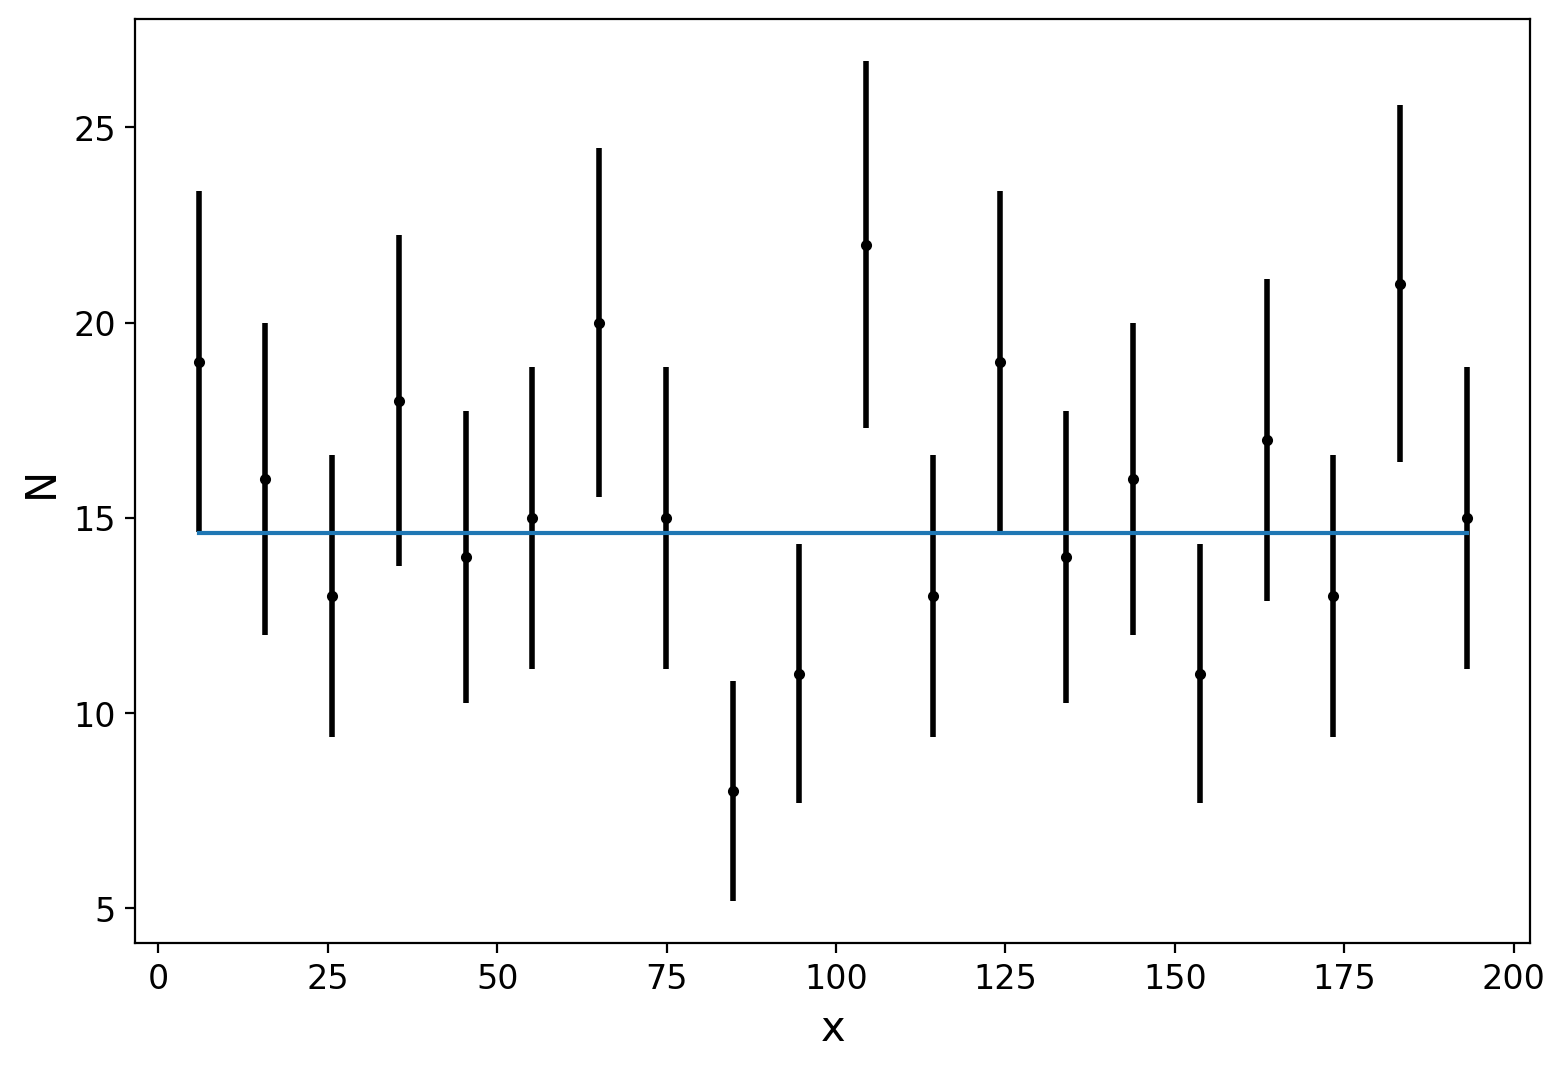

Delta negative log-likelihood: -3.261675374233164e-08
Our Probability of this happening by chance 1.0


In [43]:
#>>>RUN: L11.4-runcell03

x=bin_centers
NLL = deltaNLL(x,y,True)
print("Delta negative log-likelihood:",NLL)


probability = 1-stats.chi2.cdf(NLL, 2)
print("Our Probability of this happening by chance",probability)

In this case, you see that the delta log-likelihood is tiny and has essentially a 100% probability of happening by chance. So, fitting a flat background with and without a bump give equally good fits.

Try increasing the amplitude until you get a dataset where including the bump in the fit makes a significant difference.

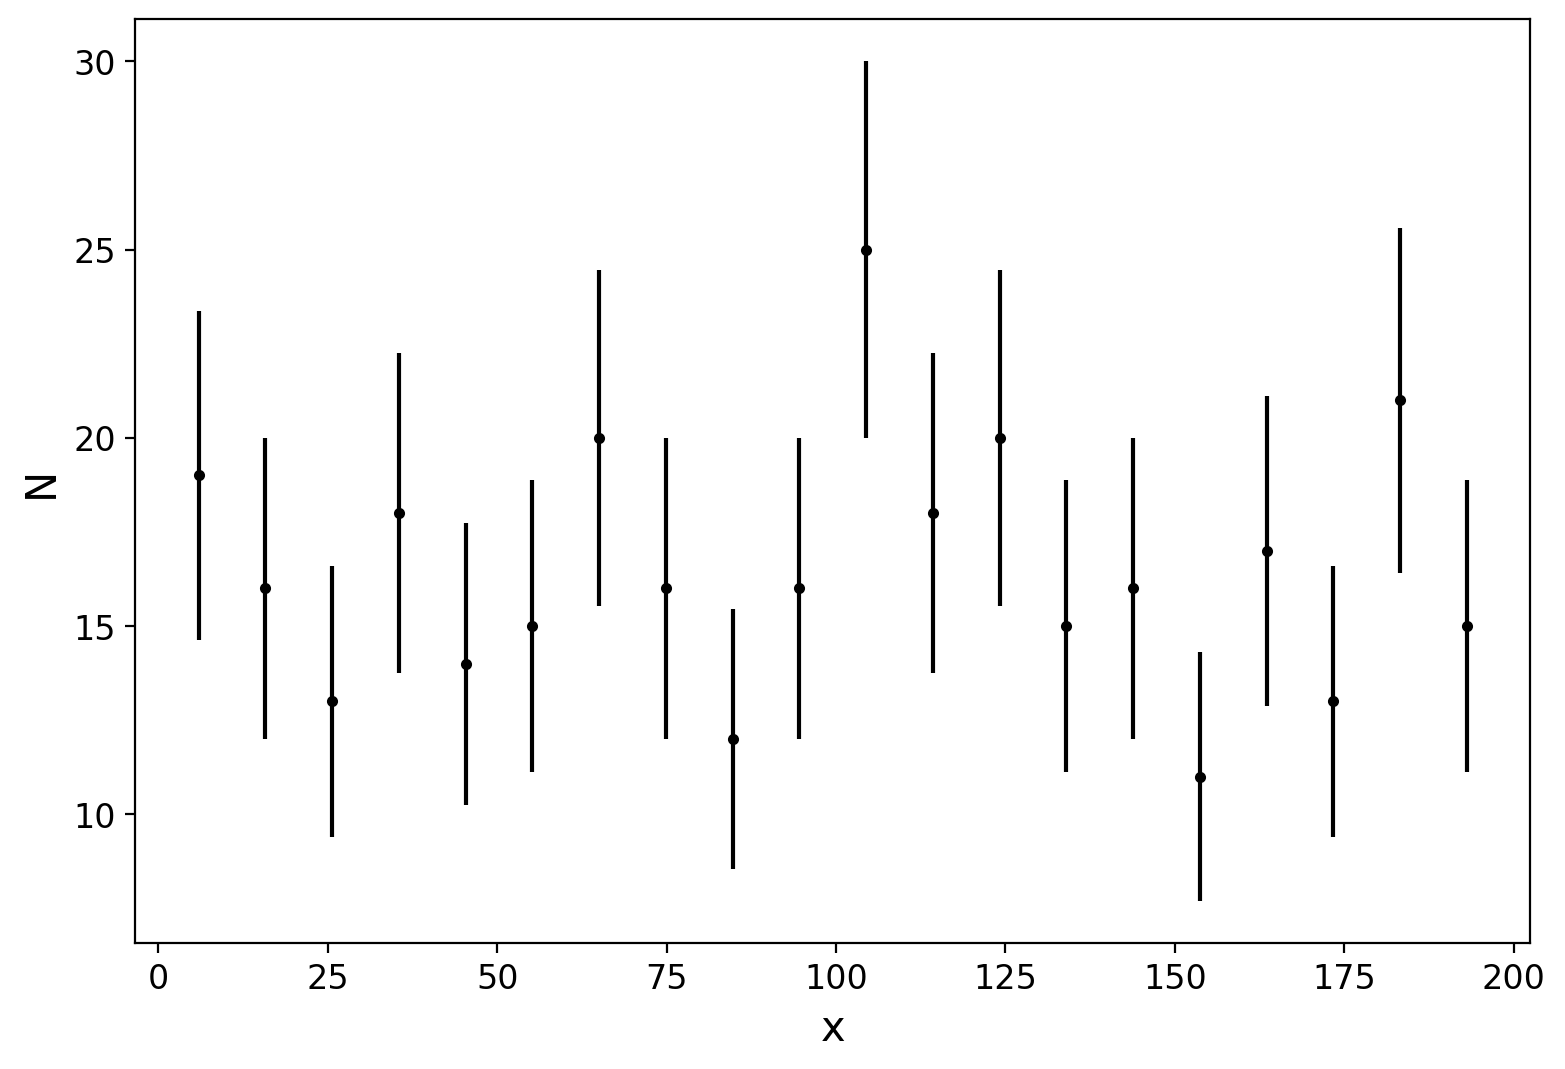

In [44]:
#>>>RUN: L11.4-runcell04

np.random.seed(42)

#First let's make a data sample and fit it
bkg = np.random.uniform(0,200, 300)
sig = np.random.normal (100,15,30) #choose different options for the number of signal events
data = np.append(sig,bkg)
y, bin_edges = np.histogram(data, bins=20)
ys, bin_edges = np.histogram(sig, bins=bin_edges)
yb, bin_edges = np.histogram(bkg, bins=bin_edges)

bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
plt.errorbar(bin_centers, y,yerr= y**0.5,marker='.',linestyle = 'None', color = 'black')
#plt.errorbar(bin_centers,yb,yerr=ys**0.5,marker='.',linestyle = '-', color = 'red',label='bkg')
#plt.errorbar(bin_centers,ys,yerr=yb**0.5,marker='.',linestyle = '-', color = 'blue',label='signal')
#plt.legend()
plt.xlabel("x")
plt.ylabel("N")
plt.show()


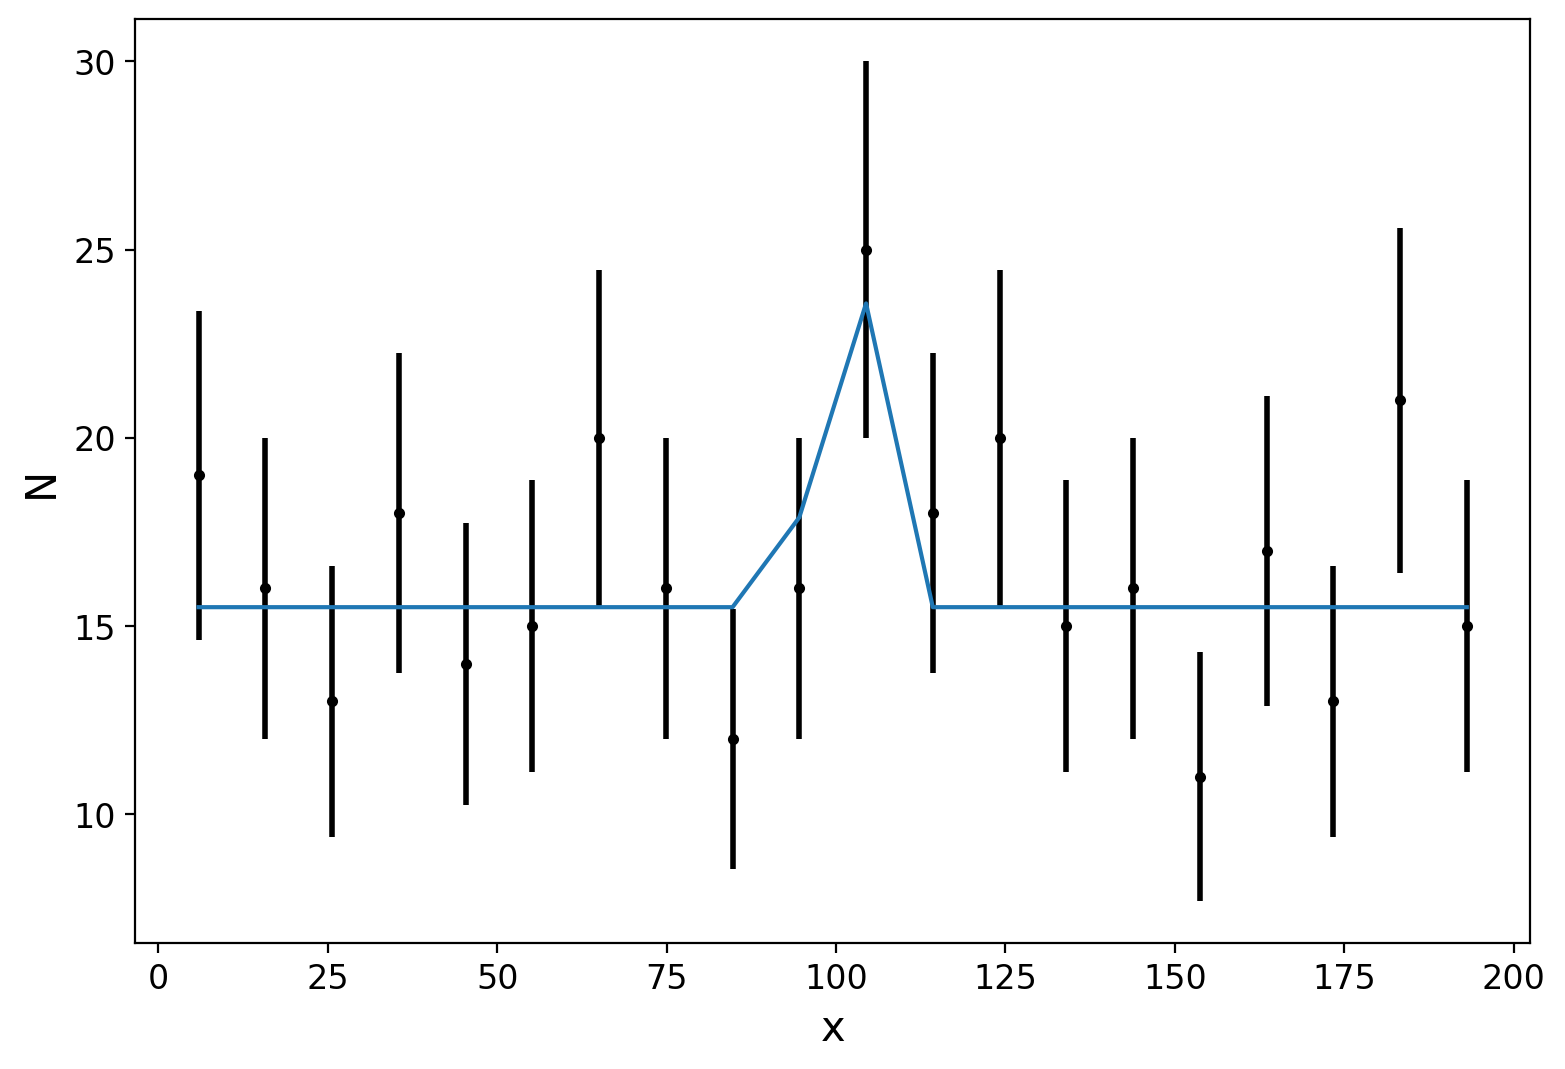

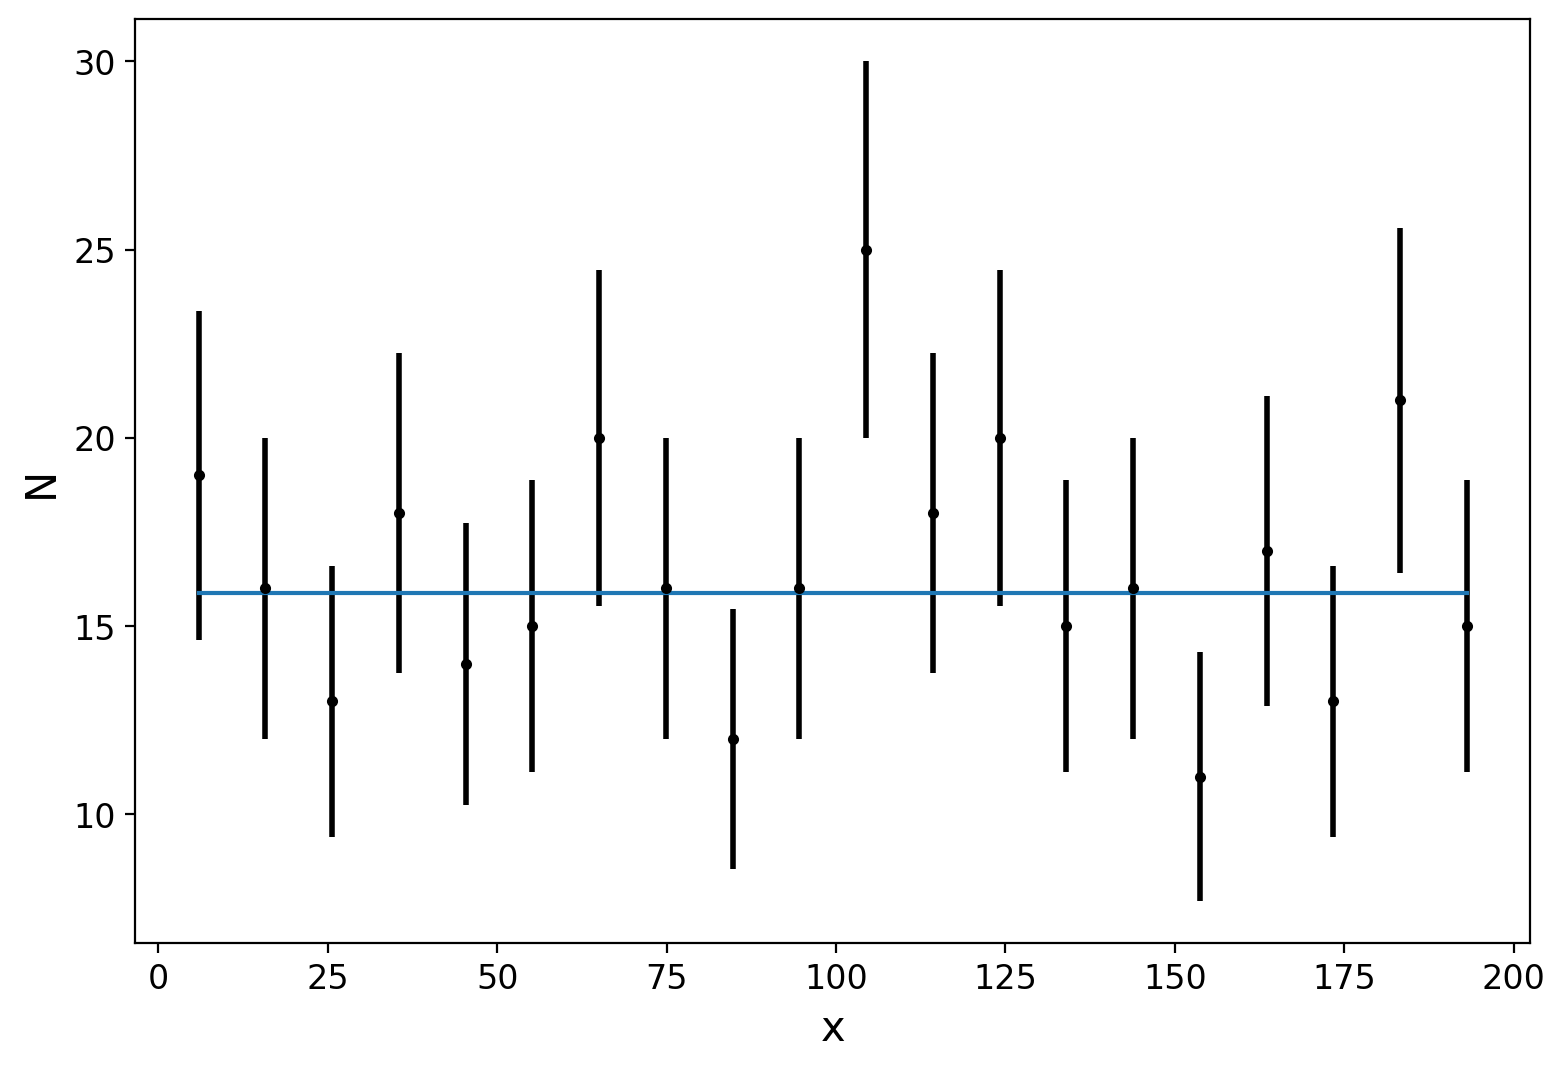

Delta negative log-likelihood: 1.571398375489764
Our Probability of this happening by chance 0.45580089994410944


In [45]:
#>>>RUN: L11.4-runcell05

x=bin_centers
NLL = deltaNLL(x,y,True)
print("Delta negative log-likelihood:",NLL)

probability = 1-stats.chi2.cdf(NLL, 2)
print("Our Probability of this happening by chance",probability)

<a name='exercises_11_4'></a>   

| [Top](#section_11_0) | [Restart Section](#section_11_4) | [Next Section](#section_11_5) |

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-11.4.1</span>

Consider your plot from Ex-11.3.2, where you scanned over a range of values for the mean of the bump and calculated the delta log-likelihood.

Now, define a function to change the y-axis to a pvalue. Complete the following code to define the function `get_prob_NLL(NLL)`, then run the cell to plot the probability as a function of $\mu$. Note, you will need to have run your solution for Ex-11.3.2 to make this plot.

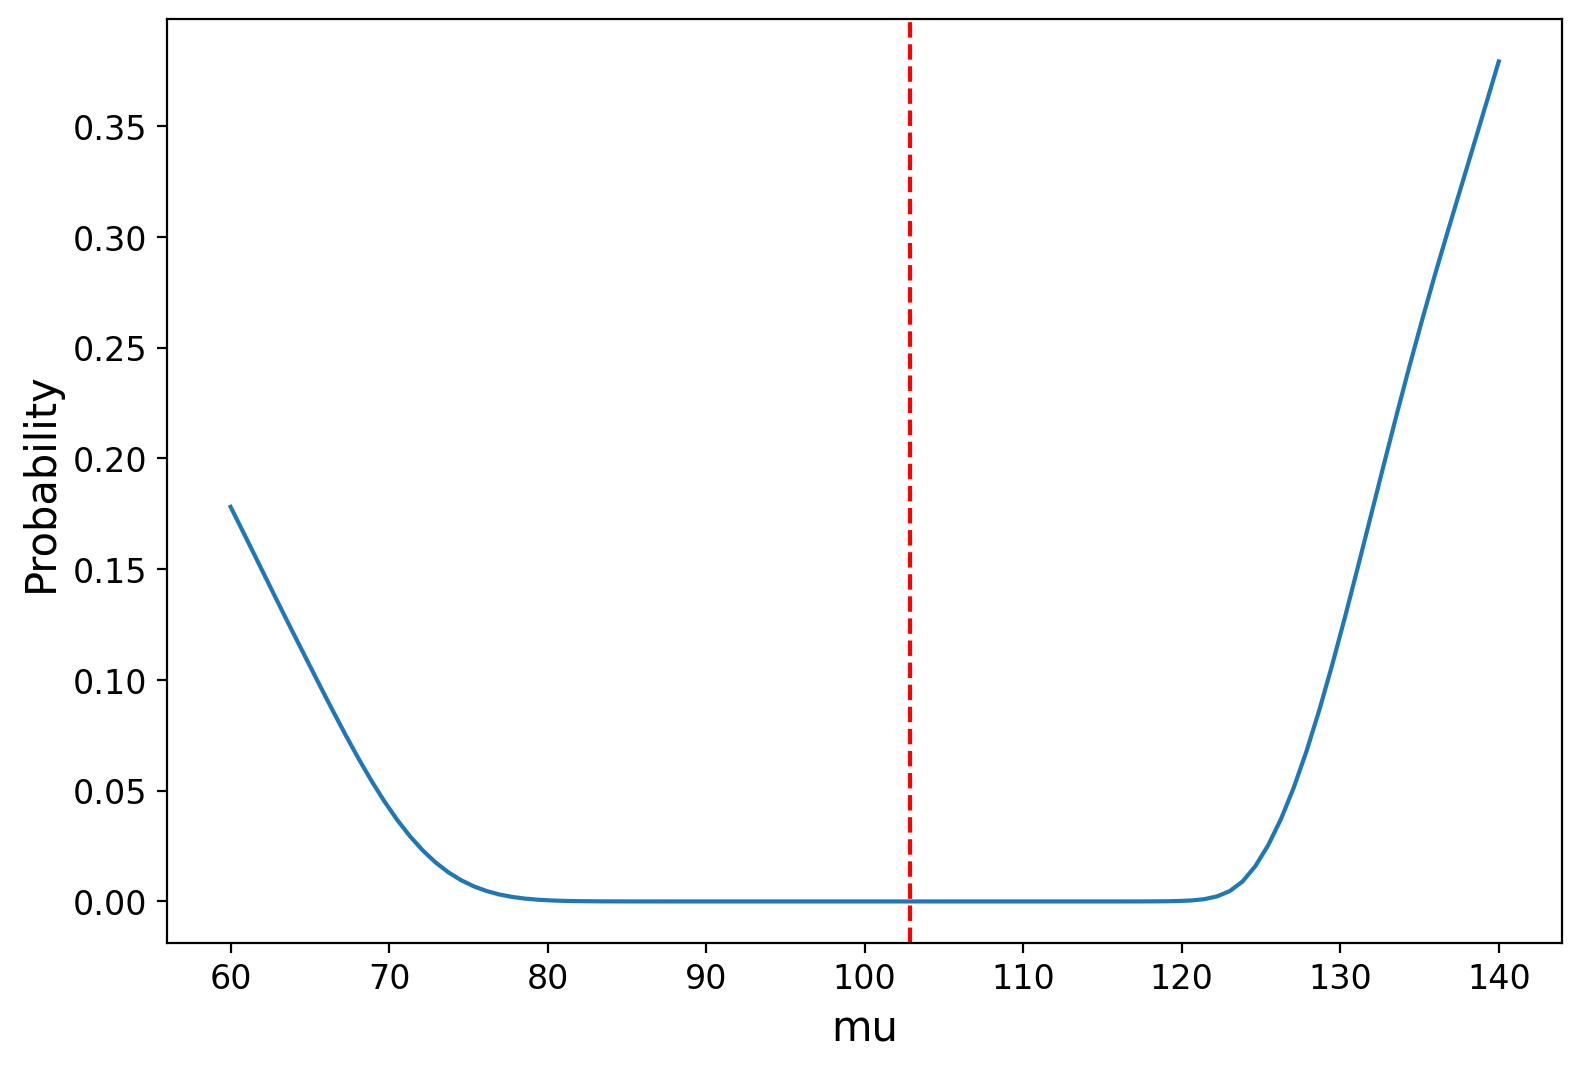

In [46]:
#>>>EXERCISE: L11.4.1
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.


def get_prob_NLL(NLL):
    return 1-stats.chi2.cdf(NLL, 2)


#process the NLL array to reassign any outliers
def reassgin_outliers(arr):
    for i in range(1, len(arr)-1):
        if abs(arr[i] - arr[i-1]) / arr[i-1] > 0.5:
            arr[i] = (arr[i-1]+arr[i+1])/2.
    return arr


nll_values_processed = reassgin_outliers(nll_values)

# plot prob vs imu
plt.plot(imu_values, get_prob_NLL(nll_values_processed))
plt.axvline(imu_max, color='r', linestyle='--')
plt.xlabel("mu")
plt.ylabel("Probability")
plt.show()


<a name='section_11_5'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L11.5 The t-test Statistic</h2>     

| [Top](#section_11_0) | [Previous Section](#section_11_4) | [Exercises](#exercises_11_5) |


*The material in this section is discussed in the video **<a href="https://courses.mitxonline.mit.edu/learn/course/course-v1:MITxT+8.S50.2x+1T2025/block-v1:MITxT+8.S50.2x+1T2025+type@sequential+block@seq_LS11/block-v1:MITxT+8.S50.2x+1T2025+type@vertical+block@vert_LS11_vid5" target="_blank">HERE</a>.** You are encouraged to watch that video and use this notebook concurrently.*


<h3>Slides</h3>

Run the code below to view the slides for this section, which are discussed in the related video. You can also open the slides in a separate window <a href="https://mitx-8s50.github.io/slides/L12/slides_L12_01.html" target="_blank">HERE</a>.

Additional content referenced in the slides is found here: https://www.youtube.com/watch?v=U9Wr7VEPGXA

In [47]:
#>>>RUN: L11.5-slides

from IPython.display import IFrame
IFrame(src='https://mitx-8s50.github.io/slides/L12/slides_L12_01.html', width=970, height=550)

<h3>t-distribution</h3>

First, a fun side story. In addition to the $\chi^{2}$ test, there is another hypothesis test known as the t-test. The origin of the t-test is that Guinness beer brewers were looking to compare beers from different sets of barley to see if they had a similar flavor. The issue was that they only had a few batches of barley, and a few batches of beer to compare distributions. In the limit of small number, we cannot assume distributions are Gaussian and, as a consequence, we cannot use the $\chi^{2}$ test.

In light of this, the <a href="https://en.wikipedia.org/wiki/Student%27s_t-test" target="_blank">Student t-test</a> was invented by William Gossett. It's called "Student t-test" because Gossett published his paper as "Student" to avoid Guinness beer proprietary regulations.

The t-test says that for $N$ samples $x_{1},...,x_{n}$, each from an underlying Gaussian distribution with mean $\mu$ and variance $\sigma^{2}$, we can define the following measured mean ($\bar{x}$) and variance($s^{2}$):


$$
\begin{equation}
\bar{x} = \frac{1}{N}\sum_{i} x_{i} \\
s^{2}   = \frac{1}{N-1}\sum_{i} \left(x_{i}-\bar{x}\right)^{2}\\
\end{equation}
$$

Then, the distribution of the mean and variance can be combined in such a way as to generate the so-called t-statistic

$$
\begin{equation}
t = \frac{\bar{x}-\mu}{s/\sqrt{N}}
\end{equation}
$$

which will follow a $t$ distribution of $\nu=N-1$ degrees of freedom, given by [1]


$$
\begin{equation}
 t(x) = \frac{\Gamma\left(\frac{\nu+1}{2}\right)}{\sqrt{\nu\pi}\ \ \Gamma\left(\frac{\nu}{2}\right)} \left(1+\frac{x^2}{\nu}\right)^{-\frac{\nu+1}{2}}
\end{equation}
$$

The t-distribution is a low-stats combination of binomial distributions. In practice, this gives us another way to test if two distributions are equivalent. This one avoids using histograms.

Let's see how it behaves by running a t-test to see how far our distributions are from $\mu=0$.

[1] Note, this definition uses the <a href="https://en.wikipedia.org/wiki/Gamma_function" target="_blank">Gamma function.</a>


The following code performs a one-sample t-test on the input sample data against a given population mean (defaulted to 0 if not provided), and it returns the p-value of the test.

It then generates three sets of random normal distributions with different population means (0.2, 1.0, and 2.0), each with a different number of samples ranging from 0 to 49. For each set of samples, the code applies the `ttest` function to calculate the p-value of the test against the corresponding population mean. These p-values are stored in three separate lists named `pvalues1`, `pvalues2`, and `pvalues3`.

We then create a plot of p-value  vs. sample size N, showing how the p-value changes as the sample size increases. Ultimately we see that larger sample size leads to a more discriminating (smaller p-value) t-test result.

<ipython-input-48-145df1bfe045>:9: RuntimeWarning: Mean of empty slice.
  t = (isamples.mean()-iMu)/(isamples.std()/np.sqrt(len(isamples)))
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


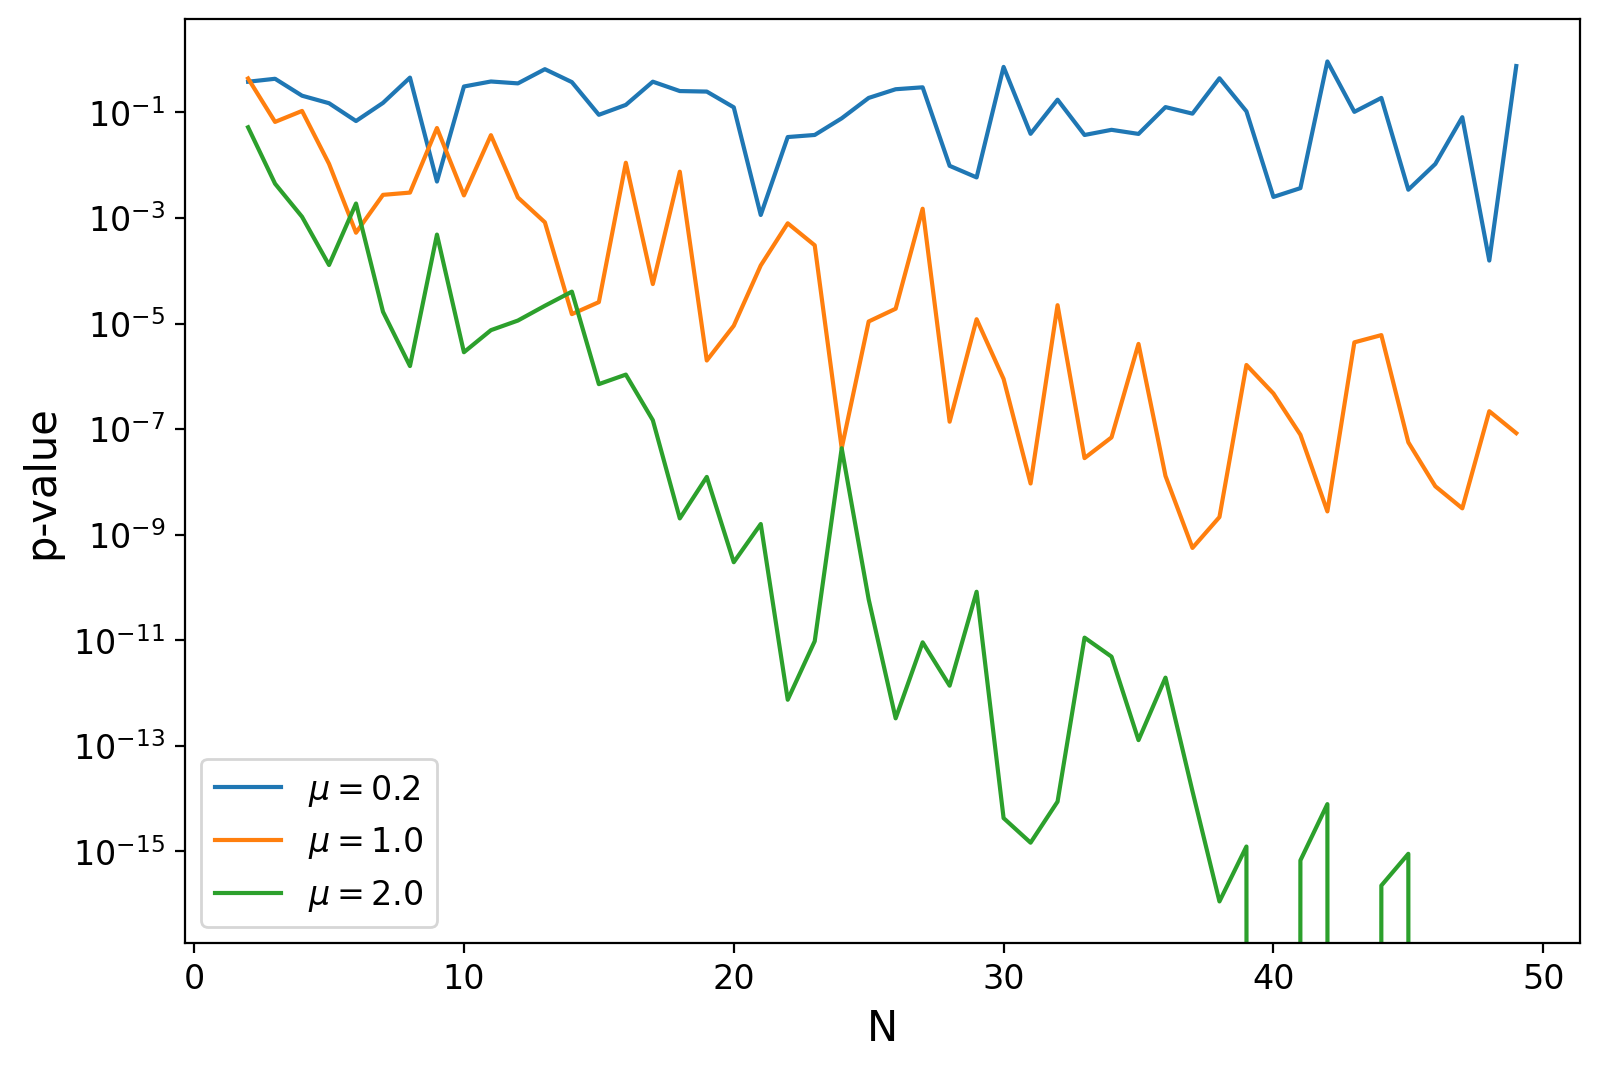

In [48]:
#>>>RUN: L11.5-runcell01

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

#now let's test if our observation is consistent with a given value of mu
def ttest(isamples,iMu=0):
    t = (isamples.mean()-iMu)/(isamples.std()/np.sqrt(len(isamples)))
    p = 1 - stats.t.cdf(t,df=len(isamples)-1)
    return p

xvals=[]
pvalues1=[]
pvalues2=[]
pvalues3=[]
for i0 in range(50):
    testsamples1 = np.random.normal(0.2,1, i0)
    pvalue = ttest(testsamples1)
    pvalues1.append(pvalue)
    testsamples2 = np.random.normal(1,1, i0)
    pvalue = ttest(testsamples2)
    pvalues2.append(pvalue)
    testsamples3 = np.random.normal(2,1, i0)
    pvalue = ttest(testsamples3)
    pvalues3.append(pvalue)
    xvals.append(i0)

fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fast')
ax.plot(xvals,pvalues1,label="$\mu=0.2$")
ax.plot(xvals,pvalues2,label="$\mu=1.0$")
ax.plot(xvals,pvalues3,label="$\mu=2.0$")
ax.set_xlabel('N')
ax.set_ylabel('p-value')
ax.set_yscale('log')
plt.legend()
plt.show()

<h3>t-test statistic</h3>

As you can see, this is a bit easier to compute than a likelihood or $\chi^{2}$ test, and in general it's more sensitive. This allows us to take into account the full set of distributions.

For completeness, the general form to compare two distributions, the modified t-statistic becomes:

$$
\begin{equation}
t = \frac{\bar{x}_{a}-\bar{x}_{b}}{s\left(\frac{1}{N_{a}} + \frac{1}{N_{b}} \right)} \\
s = \sqrt{\frac{(N_{a}-1)s_{a}^2 + (N_{b}-1)s_{b}^2 }{N_{a}+N_{b}-2} }
\end{equation}
$$

Where $s_{a}^2$ is the variance of sample $x_{a}$ and $\bar{x}_{a}$ is its mean, and the same goes for $b$. This comparison test becomes most useful when we only have a few events in each sample.

This again follows a $t$ distribution with number of degrees of freedom given by $\nu=N_{a}+N_{b}-2$. Note that if the variances are large between the two distributions, this statistic breaks down. See <a href="https://en.wikipedia.org/wiki/Student%27s_t-test" target="_blank">here</a> for more details.

<a name='exercises_11_5'></a>   

| [Top](#section_11_0) | [Restart Section](#section_11_5) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-11.5.1</span>

Complete the code below, to compare the t-test vs. $\chi^{2}$ statistic for measuring the similarity of two data sets. These functions should return the p-values for the two tests. Which test is more sensitive?

Chi2 0.09276529972980774
t-test 4.796679044718447e-22


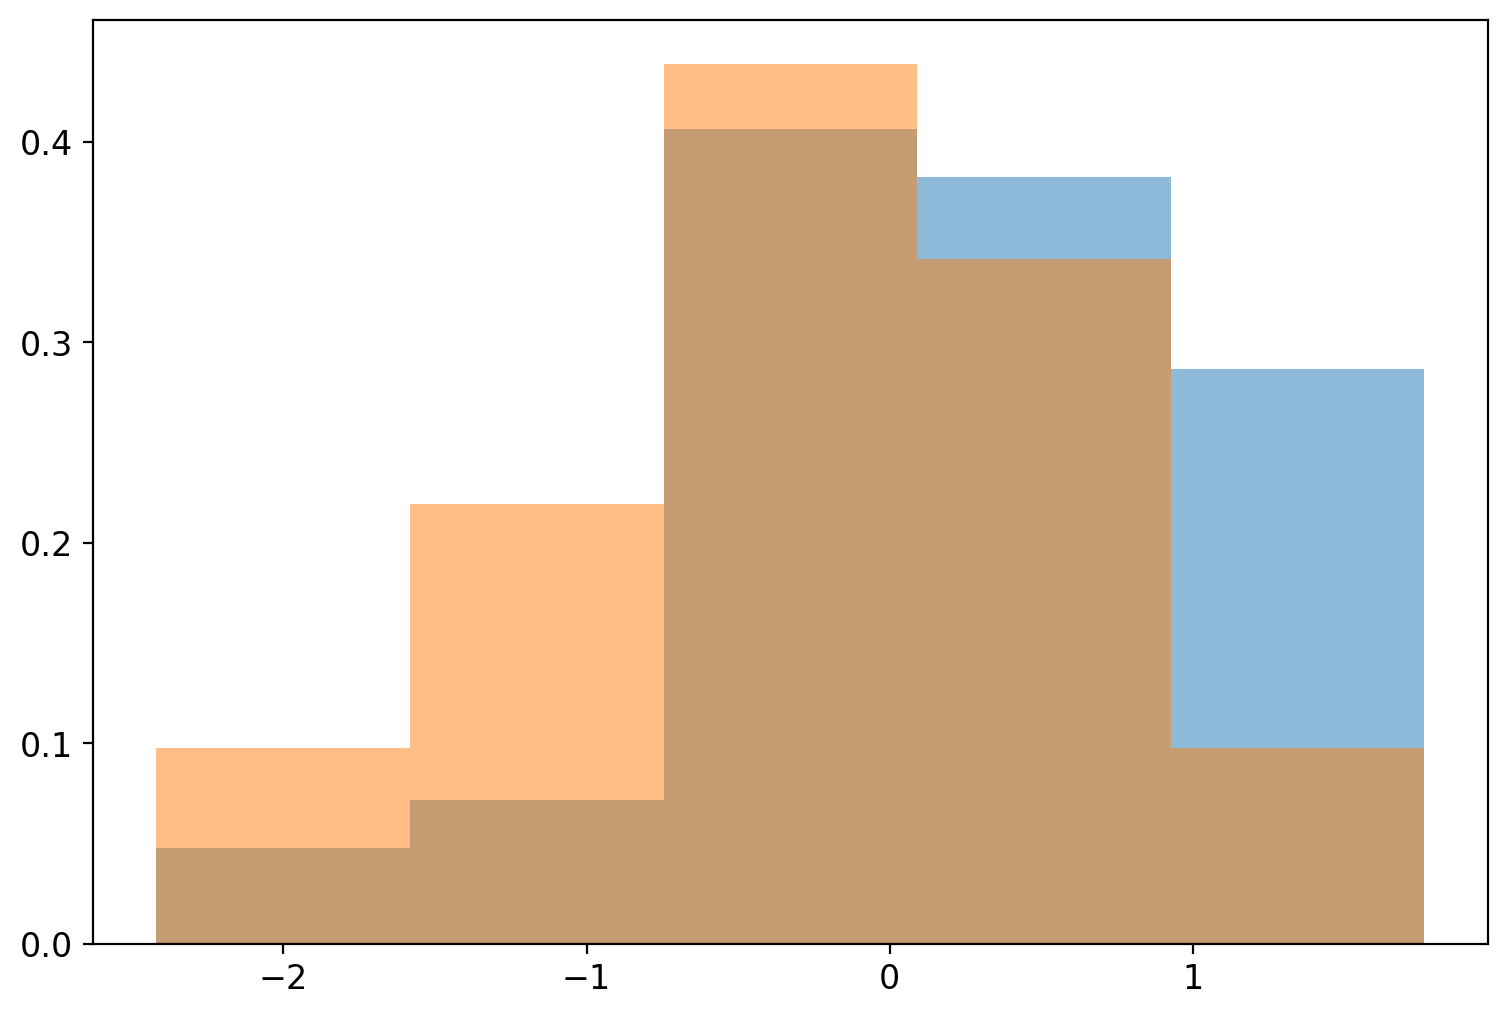

In [50]:
#>>>EXERCISE: L11.5.1

np.random.seed(42)

testSamplesA = np.random.normal(0  ,1, 50)
testSamplesB = np.random.normal(0.2,1, 50)

def chi2test(iSampleB,iSampleA,nbins=5):
    countA, binsA, ignored = plt.hist(iSampleA, nbins,      density=True ,alpha=0.5,label='a')
    countB, binsB, ignored = plt.hist(iSampleB, bins=binsA, density=True,alpha=0.5,label='b')
    chi2=0
    ndof=0
    for i0 in range(len(binsA)-1):
        if countB[i0] > 0 and countA[i0] > 0:
            unc2 = countA[i0]/len(iSampleA) +  countB[i0]/len(iSampleB)
            chi2+=(countB[i0]-countA[i0])**2/unc2
            ndof=ndof+1
    #now we rely on the chi2 distribution to get the probability
    p= 1-stats.chi2.cdf(chi2,df=ndof)
    return p

def ttest_comp(iSamplesA,iSamplesB):
    s2 = (len(iSamplesA)-1)*iSamplesA.std()**2 + (len(iSamplesB)-1)*iSamplesB.std()**2
    s2 = s2/(len(iSamplesA)+ len(iSamplesB) - 2)
    s  = np.sqrt(s2)*(1/len(iSamplesA) + 1/len(iSamplesB))
    t  = (iSamplesA.mean()-iSamplesB.mean())/s
    p  = stats.t.cdf(t,df=len(iSamplesA)+len(iSamplesB)-2)
    return p

print("Chi2",chi2test(testSamplesA,testSamplesB))
print("t-test",ttest_comp(testSamplesA,testSamplesB))